# Pre-processing del dataset [EM_DATA](https://doc.emdat.be/docs/introduction/)

![workflow](/home/anisa_bakiu/Downloads/DM_progetto/workflow_DM.png)

| Column Name | Type | Description |
|--------------|------|-------------|
| **DisNo.** | ID, Mandatory | A unique 8-digit identifier including the year (4 digits) and a sequential number (4 digits) for each disaster event (e.g., 2004-0659). In the EM-DAT Public Table, the ISO country code is appended. |
| **Historic** | Yes/No, Mandatory | Binary field specifying whether or not the disaster happened before 2000, using the Start Year. Data before 2000 are of lesser quality. |
| **Classification Key** | ID, Mandatory | Unique 15-character string identifying disasters by Group, Subgroup, Type, and Subtype. |
| **Disaster Group** | Name, Mandatory | The disaster group, e.g., “Natural” or “Technological.” |
| **Disaster Subgroup** | Name, Mandatory | The disaster subgroup. |
| **Disaster Type** | Name, Mandatory | The disaster type. |
| **Disaster Subtype** | Name, Mandatory | The disaster subtype. |
| **External IDs** | IDs List, Optional | List of identifiers for external resources (GLIDE, USGS, DFO, HANZE), in the format `<source>:<identifier>` separated by `|`. |
| **Event Name** | Optional | Short specification for disaster identification, e.g., storm (“Mitch”), plane (“Boeing 707”), disease (“Cholera”), volcano (“Etna”). |
| **ISO** | ID, Mandatory | The ISO 3-letter country code (ISO 3166). |
| **Country** | Name, Mandatory | Country where the disaster occurred, using UN M49 Standard names. If multiple countries are affected, each has a separate entry linked to the same DisNo. |
| **Subregion** | Name, Mandatory | Subregion of occurrence based on UN M49 standard, linked to Country. |
| **Region** | Name, Mandatory | Region or continent of occurrence based on UN M49 standard. |
| **Location** | Text, Optional | Geographical location name from sources (city, province, etc.), used to identify GAUL Admin Units. |
| **Origin** | Text, Optional | Contextual factors that led to the event, e.g., “heavy rains” for floods. |
| **Associated Types** | Names List, Optional | List of secondary disaster types cascading from or co-occurring with the main type (e.g., landslide after flood). |
| **OFDA/BHA Response** | Yes/No, Mandatory | Specifies whether OFDA or BHA responded to the disaster. |
| **Appeal** | Yes/No, Mandatory | Specifies whether there was a request for international assistance. |
| **Declaration** | Yes/No, Mandatory | Specifies whether a state of emergency was declared. |
| **AID Contribution (‘000 US$)** | Unadjusted Monetary Amount (‘000 US$), Optional | Total amount (in thousands of US$) of contributions for relief activities, from OCHA FTS (1992–2015). Not maintained after 2015. |
| **Magnitude** | Disaster-Type-Dependent, Optional | The intensity of a specific disaster. |
| **Magnitude Scale** | Disaster-Type-Dependent, Optional | The associated unit for the Magnitude column. |
| **Latitude** | Degrees [-90; 90], Optional | North–South coordinates, mainly for earthquakes and volcanic activity. |
| **Longitude** | Degrees [-180; 180], Optional | East–West coordinates, mainly for earthquakes and volcanic activity. |
| **River Basin** | Text, Optional | Name of affected river basins (typically used for floods). |
| **Start Year** | Numeric, Mandatory | Year of occurrence of the disaster. |
| **Start Month** | Numeric, Optional | Month of occurrence (optional for gradual disasters like droughts). |
| **Start Day** | Numeric, Optional | Day of occurrence (optional for gradual disasters). |
| **End Year** | Numeric, Optional | Year of disaster conclusion. |
| **End Month** | Numeric, Optional | Month of disaster conclusion. |
| **End Day** | Numeric, Optional | Day of disaster conclusion. |
| **Total Deaths** | Numeric, Optional | Total fatalities (deceased + missing). |
| **No. Injured** | Numeric, Optional | Number of people injured or ill requiring immediate medical assistance. |
| **No. Affected** | Numeric, Optional | Number of people requiring immediate assistance. |
| **No. Homeless** | Numeric, Optional | Number of people requiring shelter due to house destruction or damage. |
| **Total Affected** | Numeric, Optional | Total affected (injured + affected + homeless). |
| **Reconstruction Costs (‘000 US$)** | Unadjusted Monetary Amount (‘000 US$), Optional | Replacement costs for lost assets, unadjusted for inflation. |
| **Reconstruction Costs, Adjusted (‘000 US$)** | Adjusted Monetary Amount (‘000 US$), Optional | Reconstruction costs adjusted for inflation using CPI. |
| **Insured Damage (‘000 US$)** | Unadjusted Monetary Amount (‘000 US$), Optional | Economic damage covered by insurance, unadjusted for inflation. |
| **Insured Damage, Adjusted (‘000 US$)** | Adjusted Monetary Amount (‘000 US$), Optional | Insured damage adjusted for inflation using CPI. |
| **Total Damage (‘000 US$)** | Unadjusted Monetary Amount (‘000 US$), Optional | Total economic losses, unadjusted for inflation. |
| **Total Damage, Adjusted (‘000 US$)** | Adjusted Monetary Amount (‘000 US$), Optional | Total damage adjusted for inflation using CPI. |
| **CPI** | Conversion Ratio, Optional | Consumer Price Index (OECD) used for inflation adjustment. |
| **Admin Units** | JSON Array of Objects, Optional | Impacted Administrative Units from FAO GAUL 2015. Geocoding maintained for non-biological natural hazards since 2000. |
| **Entry Date** | Date, Mandatory | Date on which the event record was created in EM-DAT. |
| **Last Update** | Date, Mandatory | Date of last modification of the event or related records in EM-DAT. |

## Caricamento del dataset

In [7]:
import numpy as np
import pandas as pd

df = pd.read_excel("emdata.xlsx", na_values= ["", "NA", "N/A", "n.a.", "-", None])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27262 entries, 0 to 27261
Data columns (total 46 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   DisNo.                                     27262 non-null  object 
 1   Historic                                   27262 non-null  object 
 2   Classification Key                         27262 non-null  object 
 3   Disaster Group                             27262 non-null  object 
 4   Disaster Subgroup                          27262 non-null  object 
 5   Disaster Type                              27262 non-null  object 
 6   Disaster Subtype                           27262 non-null  object 
 7   External IDs                               4338 non-null   object 
 8   Event Name                                 8579 non-null   object 
 9   ISO                                        27262 non-null  object 
 10  Country               

In [9]:
df.head(10)

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,1900-0003-USA,Yes,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,USA,...,NaN,NaN,NaN,NaN,30000.0,1131126.0,2.652223,NaN,2004-10-18,2023-10-17
1,1900-0005-USA,Yes,tec-ind-fir-fir,Technological,Industrial accident,Fire (Industrial),Fire (Industrial),NaN,NaN,USA,...,NaN,NaN,NaN,NaN,NaN,NaN,2.652223,NaN,2003-07-01,2023-09-25
2,1900-0006-JAM,Yes,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,JAM,...,NaN,NaN,NaN,NaN,NaN,NaN,2.652223,NaN,2003-07-01,2023-09-25
3,1900-0007-JAM,Yes,nat-bio-epi-vir,Natural,Biological,Epidemic,Viral disease,NaN,Gastroenteritis,JAM,...,NaN,NaN,NaN,NaN,NaN,NaN,2.652223,NaN,2003-07-01,2023-09-25
4,1900-0008-JPN,Yes,nat-geo-vol-ash,Natural,Geophysical,Volcanic activity,Ash fall,NaN,NaN,JPN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.652223,NaN,2003-07-01,2023-09-25
5,1900-0009-TUR,Yes,nat-geo-ear-gro,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,TUR,...,NaN,NaN,NaN,NaN,NaN,NaN,2.652223,NaN,2019-08-05,2023-09-25
6,1900-9001-IND,Yes,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,IND,...,NaN,NaN,NaN,NaN,NaN,NaN,2.652223,NaN,2006-12-01,2025-03-06
7,1900-9002-CPV,Yes,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,CPV,...,NaN,NaN,NaN,NaN,NaN,NaN,2.652223,NaN,2006-12-01,2025-03-06
8,1901-0001-UGA,Yes,nat-bio-epi-dis,Natural,Biological,Epidemic,Infectious disease (General),NaN,NaN,UGA,...,NaN,NaN,NaN,NaN,NaN,NaN,2.652223,NaN,2003-07-01,2023-09-25
9,1901-0003-BEL,Yes,tec-ind-exp-exp,Technological,Industrial accident,Explosion (Industrial),Explosion (Industrial),NaN,Coal mine,BEL,...,NaN,NaN,NaN,NaN,NaN,NaN,2.652223,NaN,2005-04-13,2023-09-25


In [10]:
print(f'Le dimensioni del dataset sono: {df.shape[0]} righe e {df.shape[1]} colonne.')

Le dimensioni del dataset sono: 27262 righe e 46 colonne.


In [12]:
# Elimino le colonne non rilevanti ai fini delle analisi
df.drop(columns= ['Classification Key', 'External IDs', 
                  'Event Name','Entry Date','Last Update',
                   "AID Contribution ('000 US$)", 'River Basin'], inplace= True)

## Analisi esplorativa (EDA)

### Statistiche descrittive

In [13]:
import plotly.express as px

fig = px.treemap(
    df,
    path=['Disaster Subgroup', 'Disaster Type', 'Disaster Subtype'],
    title="Distribuzione gerarchica dei disastri"
)
fig.show()

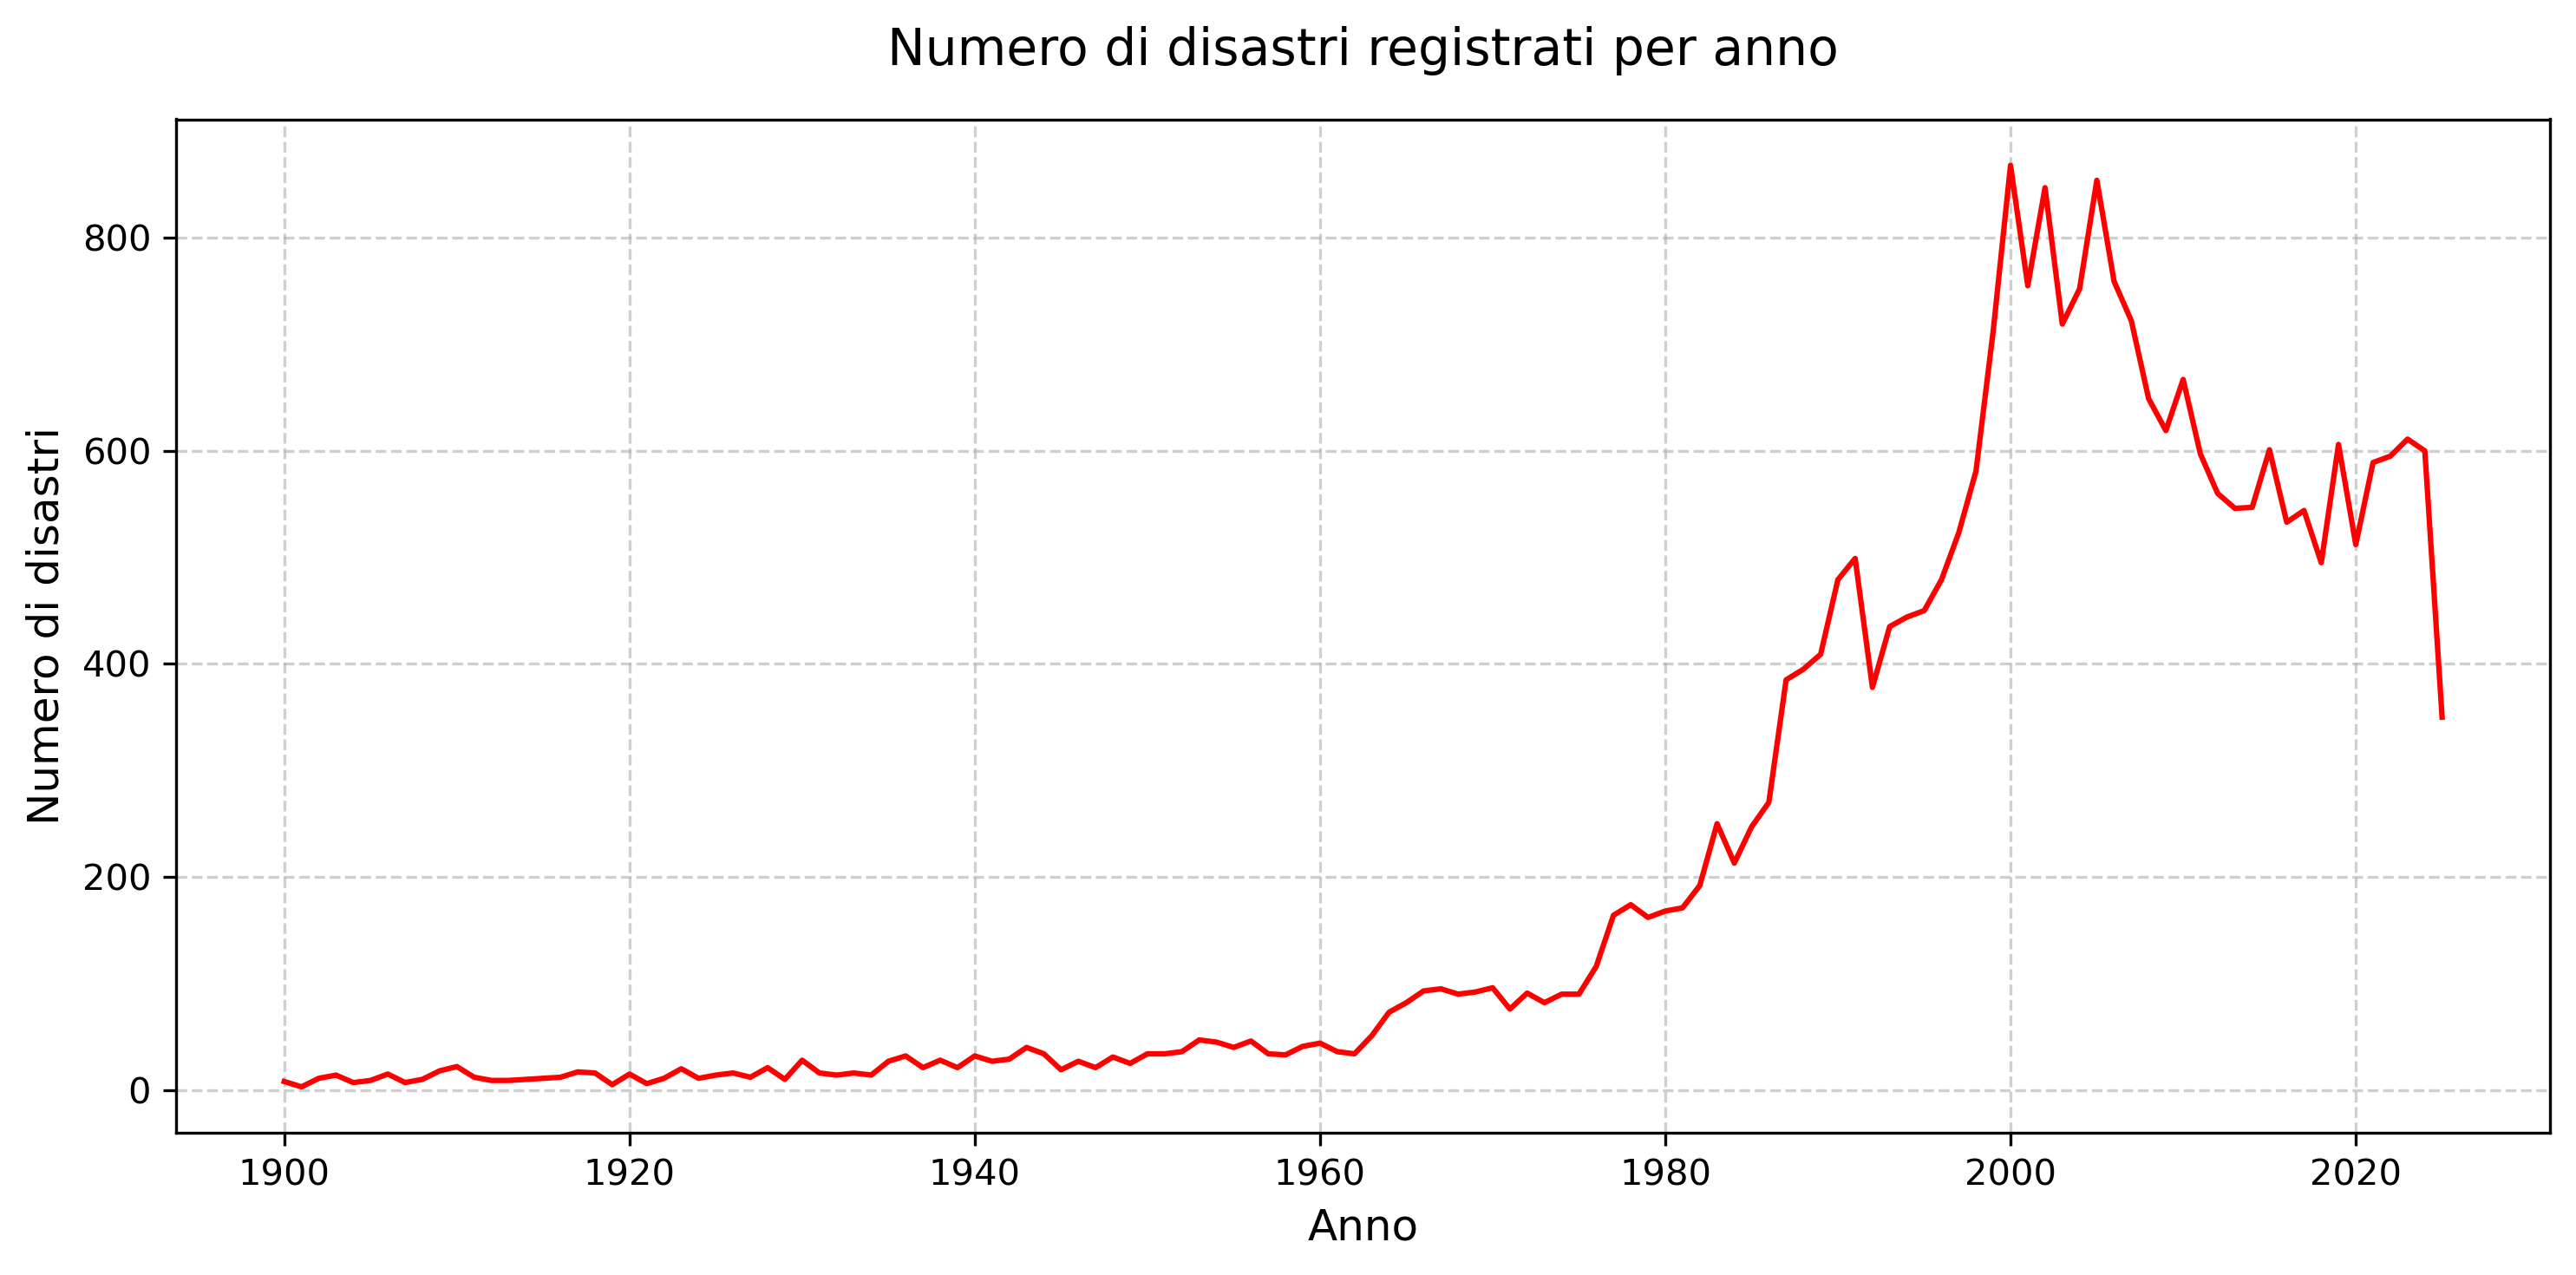

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Disastri per anno
yearly_counts = df['Start Year'].value_counts().sort_index()

plt.figure(figsize=(10, 5), dpi=300)
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, color='red')

plt.title("Numero di disastri registrati per anno", fontsize=14, pad=15)
plt.xlabel("Anno", fontsize=12)
plt.ylabel("Numero di disastri", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


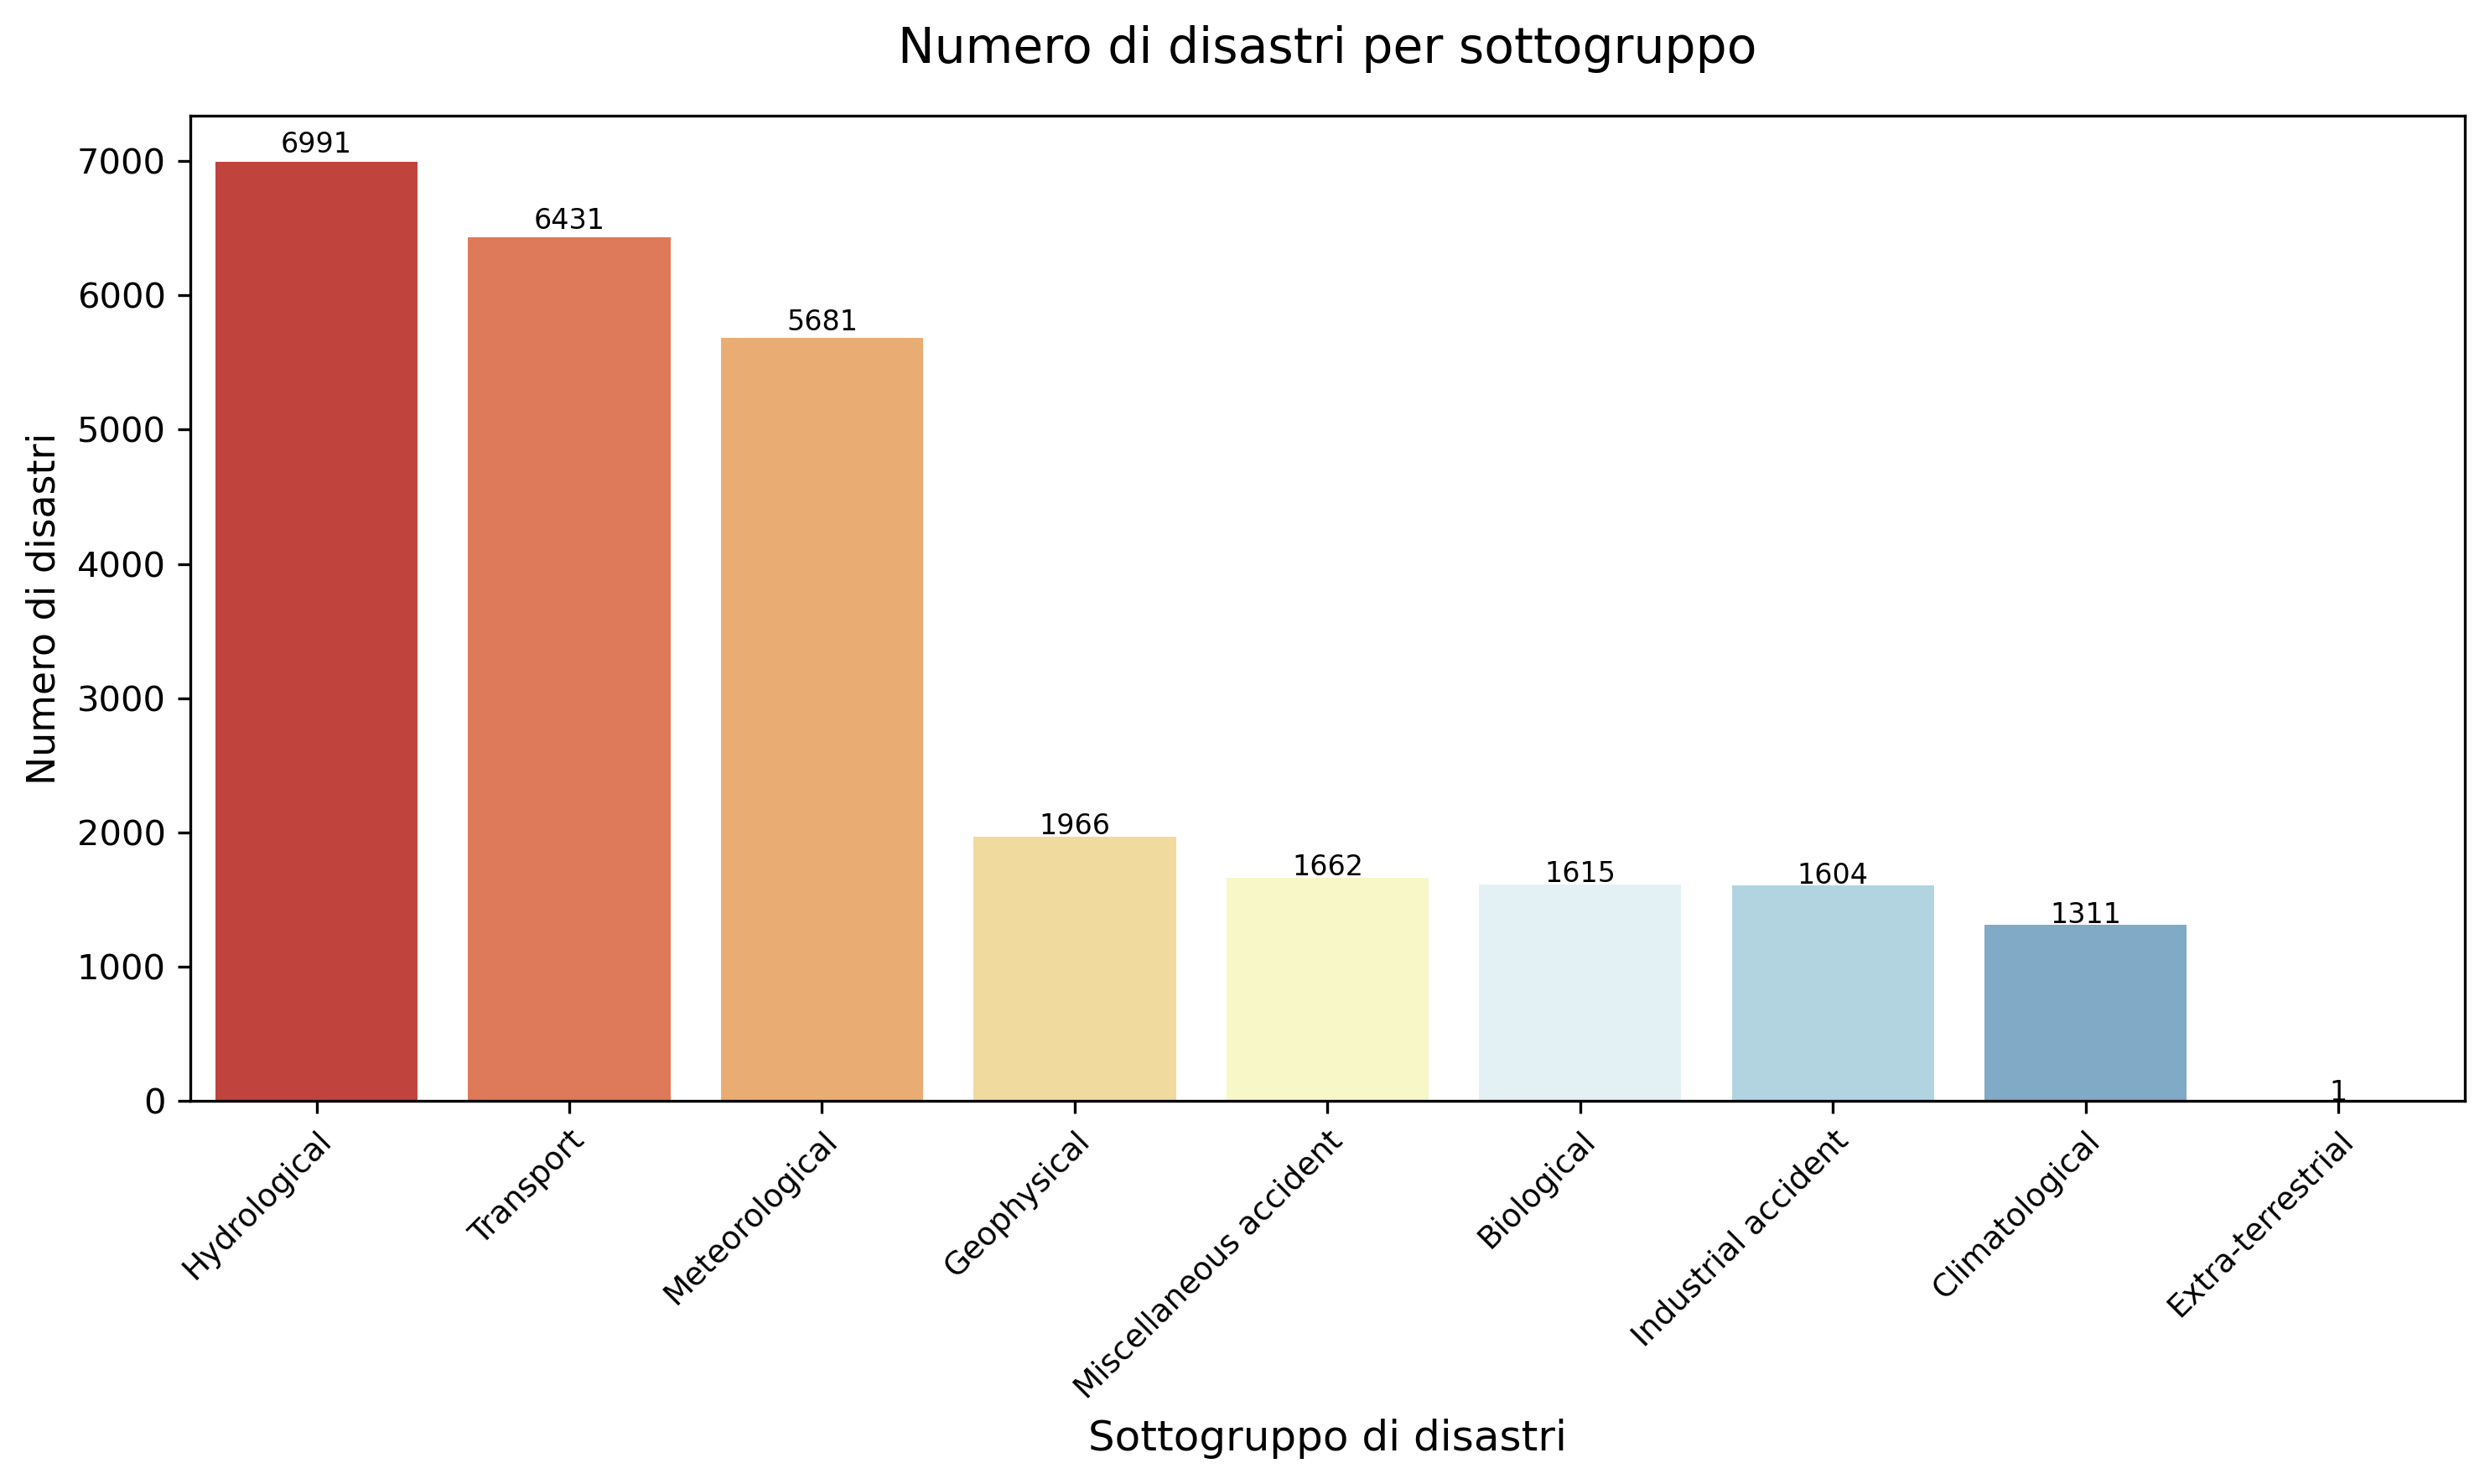

In [15]:
# Disastri per sottogruppo
subgroup_counts = df['Disaster Subgroup'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 6), dpi=300)
ax = sns.barplot(
    x=subgroup_counts.index,
    y=subgroup_counts.values,
    hue=subgroup_counts.index,
    palette='RdYlBu',
    legend=False
)

for i, v in enumerate(subgroup_counts.values):
    ax.text(i, v + (v * 0.01), str(v), ha='center', fontsize=8)

plt.title("Numero di disastri per sottogruppo", fontsize=14, pad=15)
plt.xlabel("Sottogruppo di disastri", fontsize=12)
plt.ylabel("Numero di disastri", fontsize=11)

plt.xticks(rotation=45, ha='right', rotation_mode='anchor', fontsize=9)

plt.tight_layout()
plt.show()

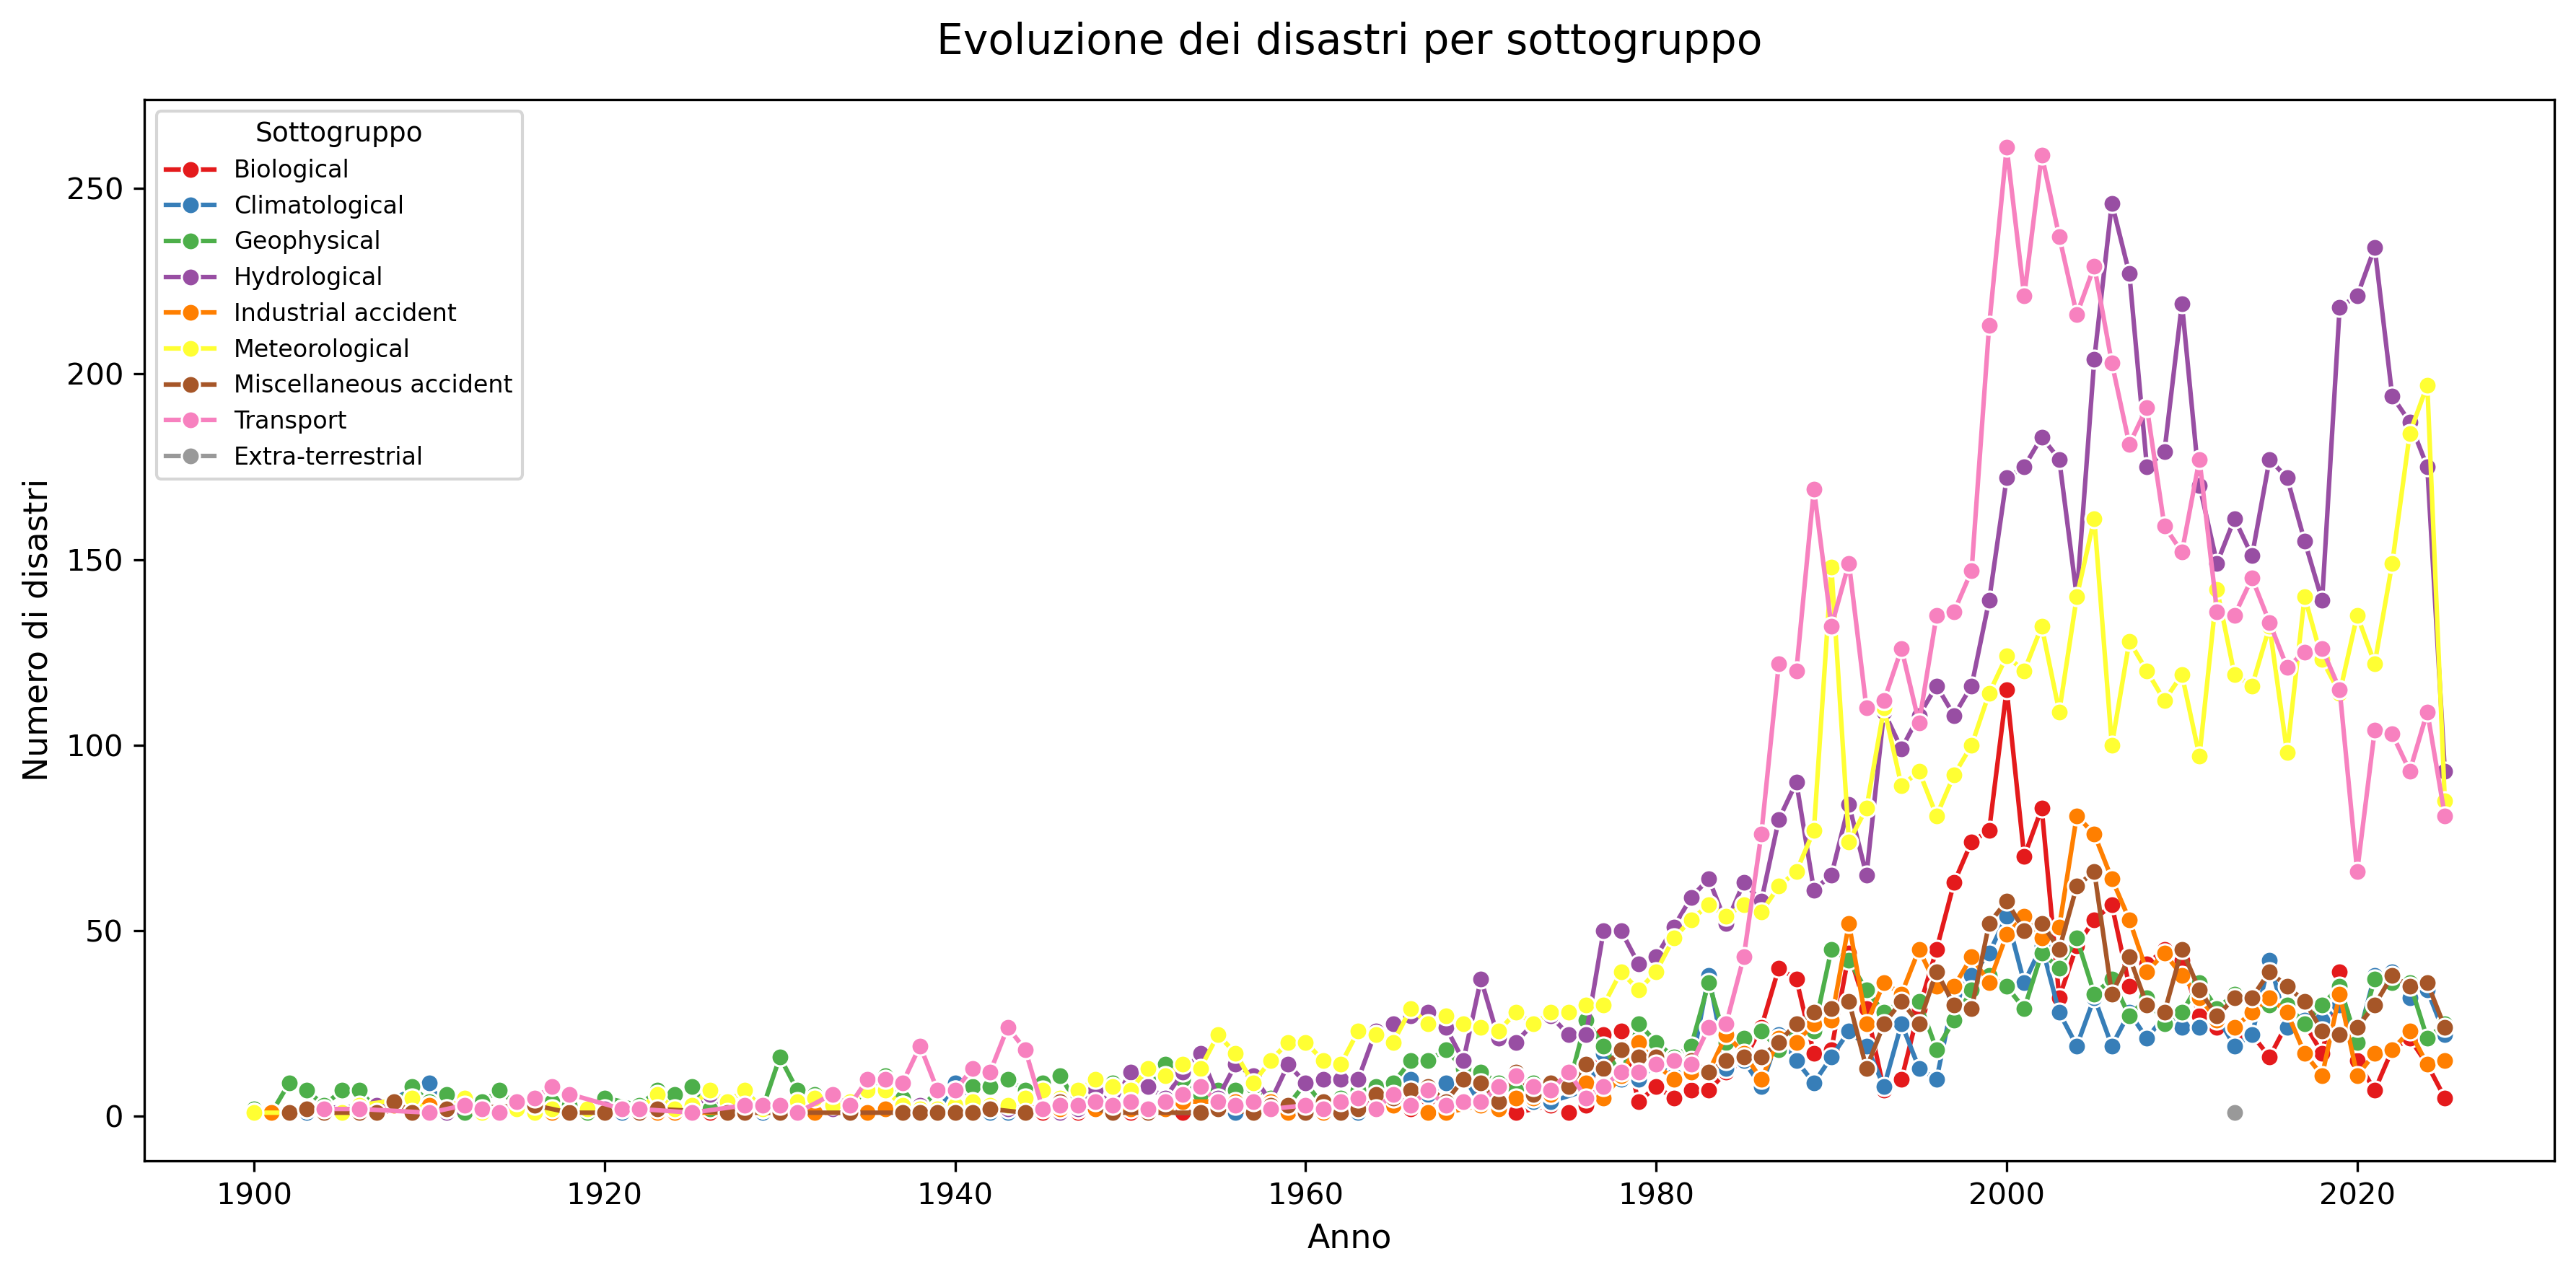

In [16]:
subgroup_year = (
    df.groupby(['Start Year', 'Disaster Subgroup'])
    .size()
    .reset_index(name='Count')
)

plt.figure(figsize=(12,6), dpi=300)
sns.lineplot(data=subgroup_year, x='Start Year', y='Count', hue='Disaster Subgroup', marker='o', palette='Set1')
plt.title("Evoluzione dei disastri per sottogruppo", fontsize=14, pad=15)
plt.xlabel("Anno", fontsize=11)
plt.ylabel("Numero di disastri", fontsize=11)
plt.legend(title="Sottogruppo", fontsize=8, title_fontsize=9)
plt.tight_layout()
plt.show()

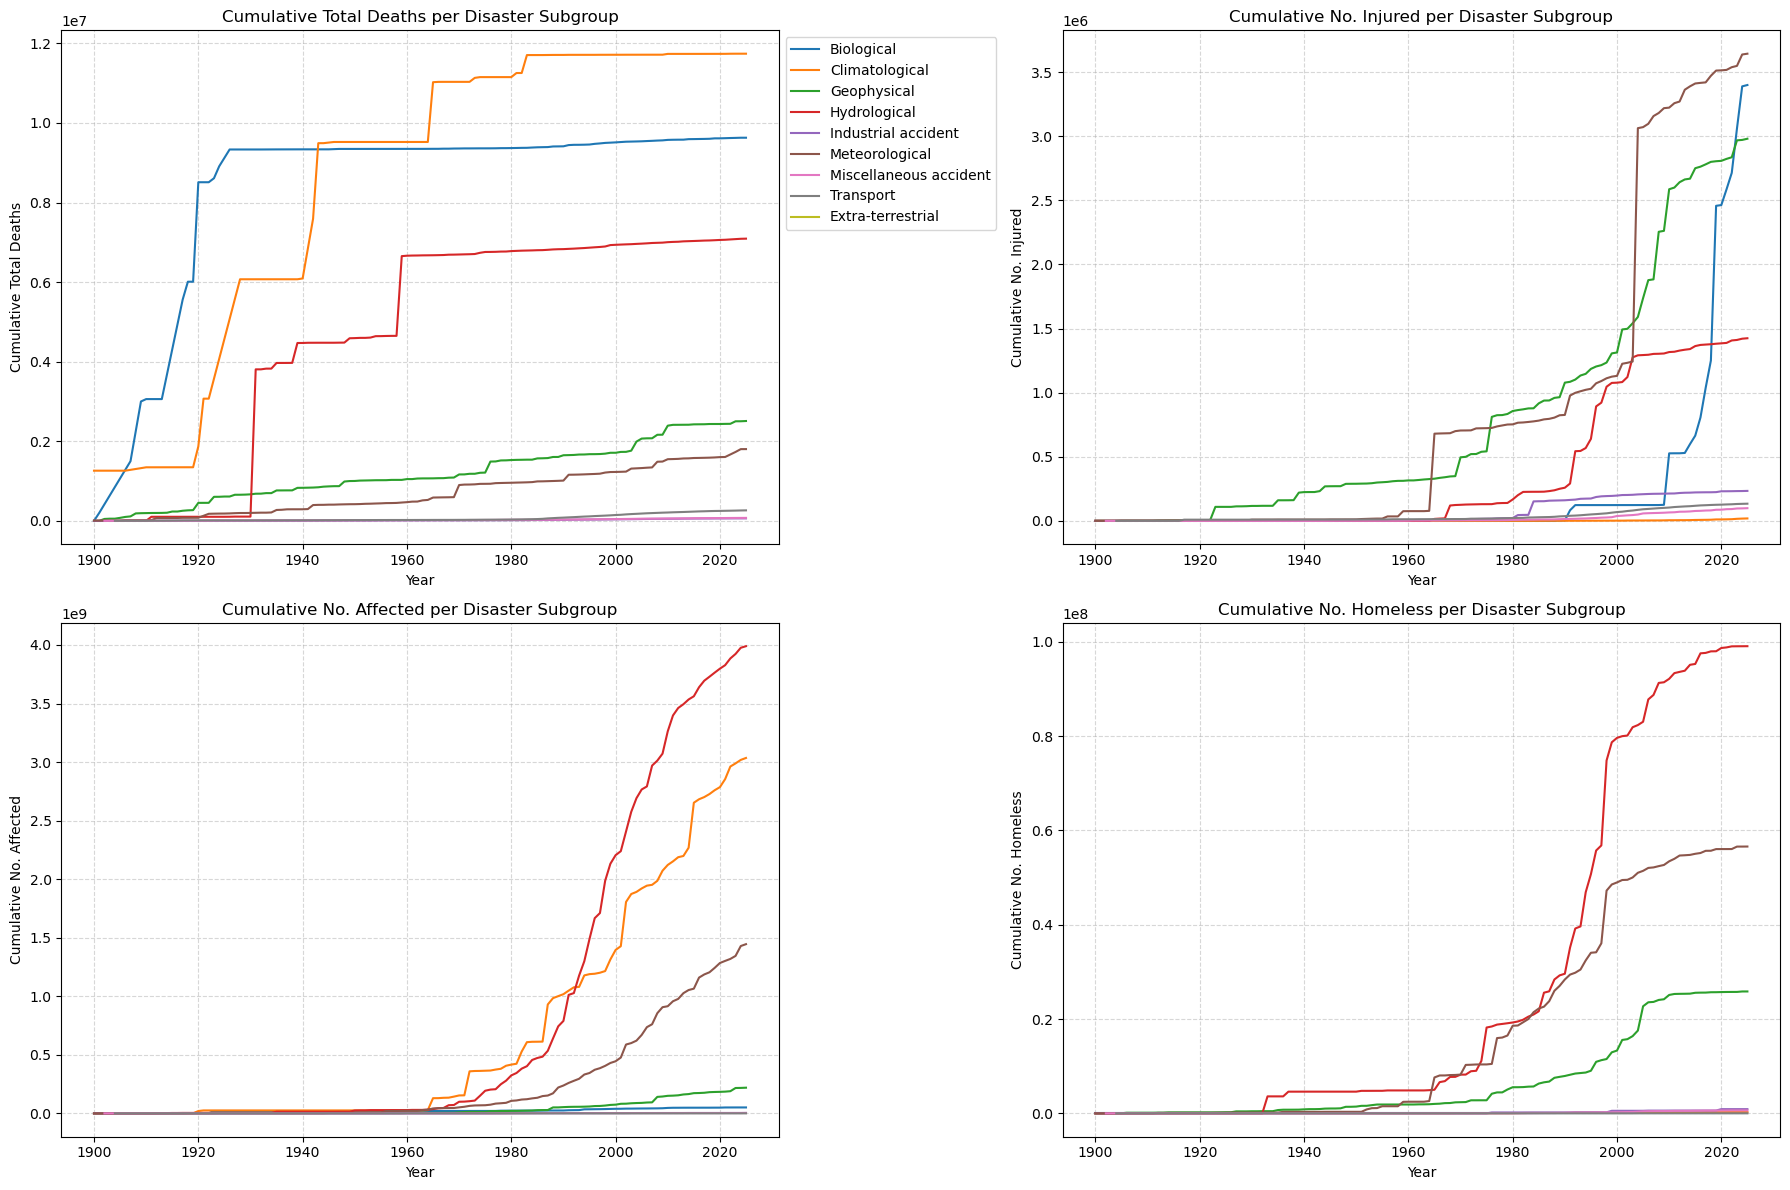

In [17]:
# Seleziona le colonne rilevanti
cols = ['Start Year', 'Disaster Subgroup', 'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless']
df_metrics = df[cols].copy()

# Riempie NaN con zero per il cumulativo
df_metrics[['Total Deaths','No. Injured','No. Affected','No. Homeless']] = df_metrics[['Total Deaths','No. Injured','No. Affected','No. Homeless']].fillna(0)

# Raggruppa per anno e sottogruppo di disastro e somma le metriche
df_grouped = df_metrics.groupby(['Start Year', 'Disaster Subgroup']).sum().reset_index()

# Ordina per anno
df_grouped = df_grouped.sort_values('Start Year')

# Crea grafici cumulativi per ciascuna metrica
metrics = ['Total Deaths','No. Injured','No. Affected','No. Homeless']
plt.figure(figsize=(18,12))
palette = sns.color_palette('tab20', n_colors=df_grouped['Disaster Subgroup'].nunique())

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    for subgroup in df_grouped['Disaster Subgroup'].unique():
        temp = df_grouped[df_grouped['Disaster Subgroup']==subgroup]
        # cumulativo
        temp_cum = temp.set_index('Start Year')[metric].cumsum()
        plt.plot(temp_cum.index, temp_cum.values, label=subgroup)
    plt.title(f'Cumulative {metric} per Disaster Subgroup')
    plt.xlabel('Year')
    plt.ylabel(f'Cumulative {metric}')
    plt.grid(True, linestyle='--', alpha=0.5)
    if i == 1:
        plt.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize=10)

plt.tight_layout()
plt.show()

In [18]:
# Seleziona le colonne rilevanti
cols = ['Disaster Subgroup',
        "Reconstruction Costs, Adjusted ('000 US$)",
        "Insured Damage, Adjusted ('000 US$)",
        "Total Damage, Adjusted ('000 US$)"]

df_econ = df[cols].copy()

# Riempie NaN con zero
df_econ[cols[1:]] = df_econ[cols[1:]].fillna(0)

# Raggruppa per Disaster Subgroup sommando i costi
df_grouped = df_econ.groupby('Disaster Subgroup')[cols[1:]].sum()

# Ordina per Total Damage decrescente
df_grouped = df_grouped.sort_values("Total Damage, Adjusted ('000 US$)", ascending=False)

# Reset index e melt per Plotly
metrics = cols[1:]  # le colonne dei costi
df_plot = df_grouped.reset_index().melt(id_vars='Disaster Subgroup', 
                                        value_vars=metrics,
                                        var_name='Metric', 
                                        value_name='Cost')

# Plot interattivo
fig = px.bar(df_plot, 
             x='Disaster Subgroup', 
             y='Cost', 
             color='Metric', 
             barmode='group',
             title='Impatto economico per il sottogruppo di disastri')

fig.update_layout(xaxis_tickangle=-45)
fig.show()

I disastri più costosi ricevono più facilmente una dichiarazione di emergenza?

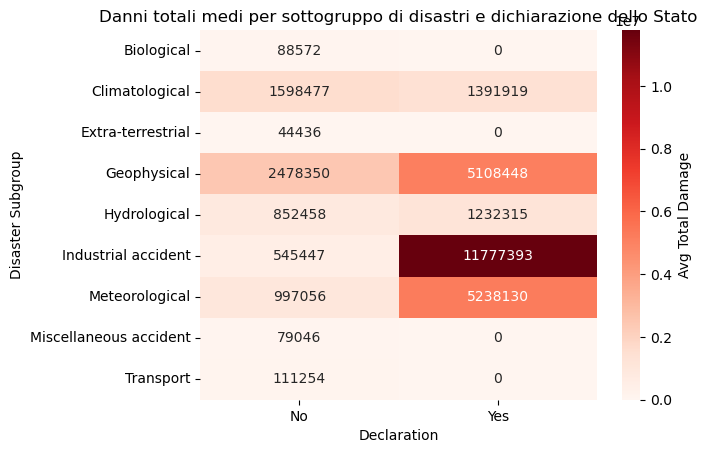

<Figure size 3600x2400 with 0 Axes>

In [19]:
pivot = df.pivot_table(index='Disaster Subgroup', columns='Declaration',
                       values="Total Damage, Adjusted ('000 US$)", aggfunc='mean').fillna(0)

sns.heatmap(pivot, annot=True, fmt=".0f", cmap='Reds', cbar_kws={'label':'Avg Total Damage'})
plt.title('Danni totali medi per sottogruppo di disastri e dichiarazione dello Stato')
plt.figure(figsize=(12, 8), dpi = 300)
plt.show()

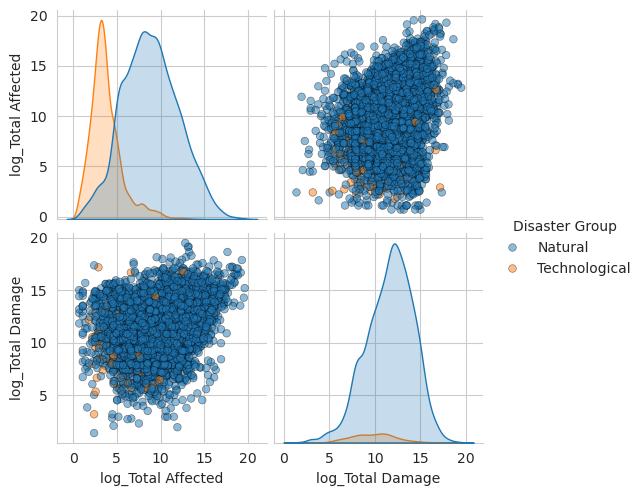

In [20]:
# Creiamo nuove colonne log-transformed per distribuire meglio i dati
df['log_Total Affected'] = np.log1p(df['Total Affected'])
df['log_Total Damage'] = np.log1p(df["Total Damage, Adjusted ('000 US$)"])

plot_vars = ['log_Total Affected', 'log_Total Damage']

# Pairplot 
sns.set_style("whitegrid")
pair = sns.pairplot(df, 
                    vars=plot_vars, 
                    hue='Disaster Group',  
                    diag_kind='kde', 
                    plot_kws={'alpha':0.5, 's':30, 'edgecolor':'k'},
                    diag_kws={'fill':True})

plt.show()

### Rappresentazioni spaziali dei dati

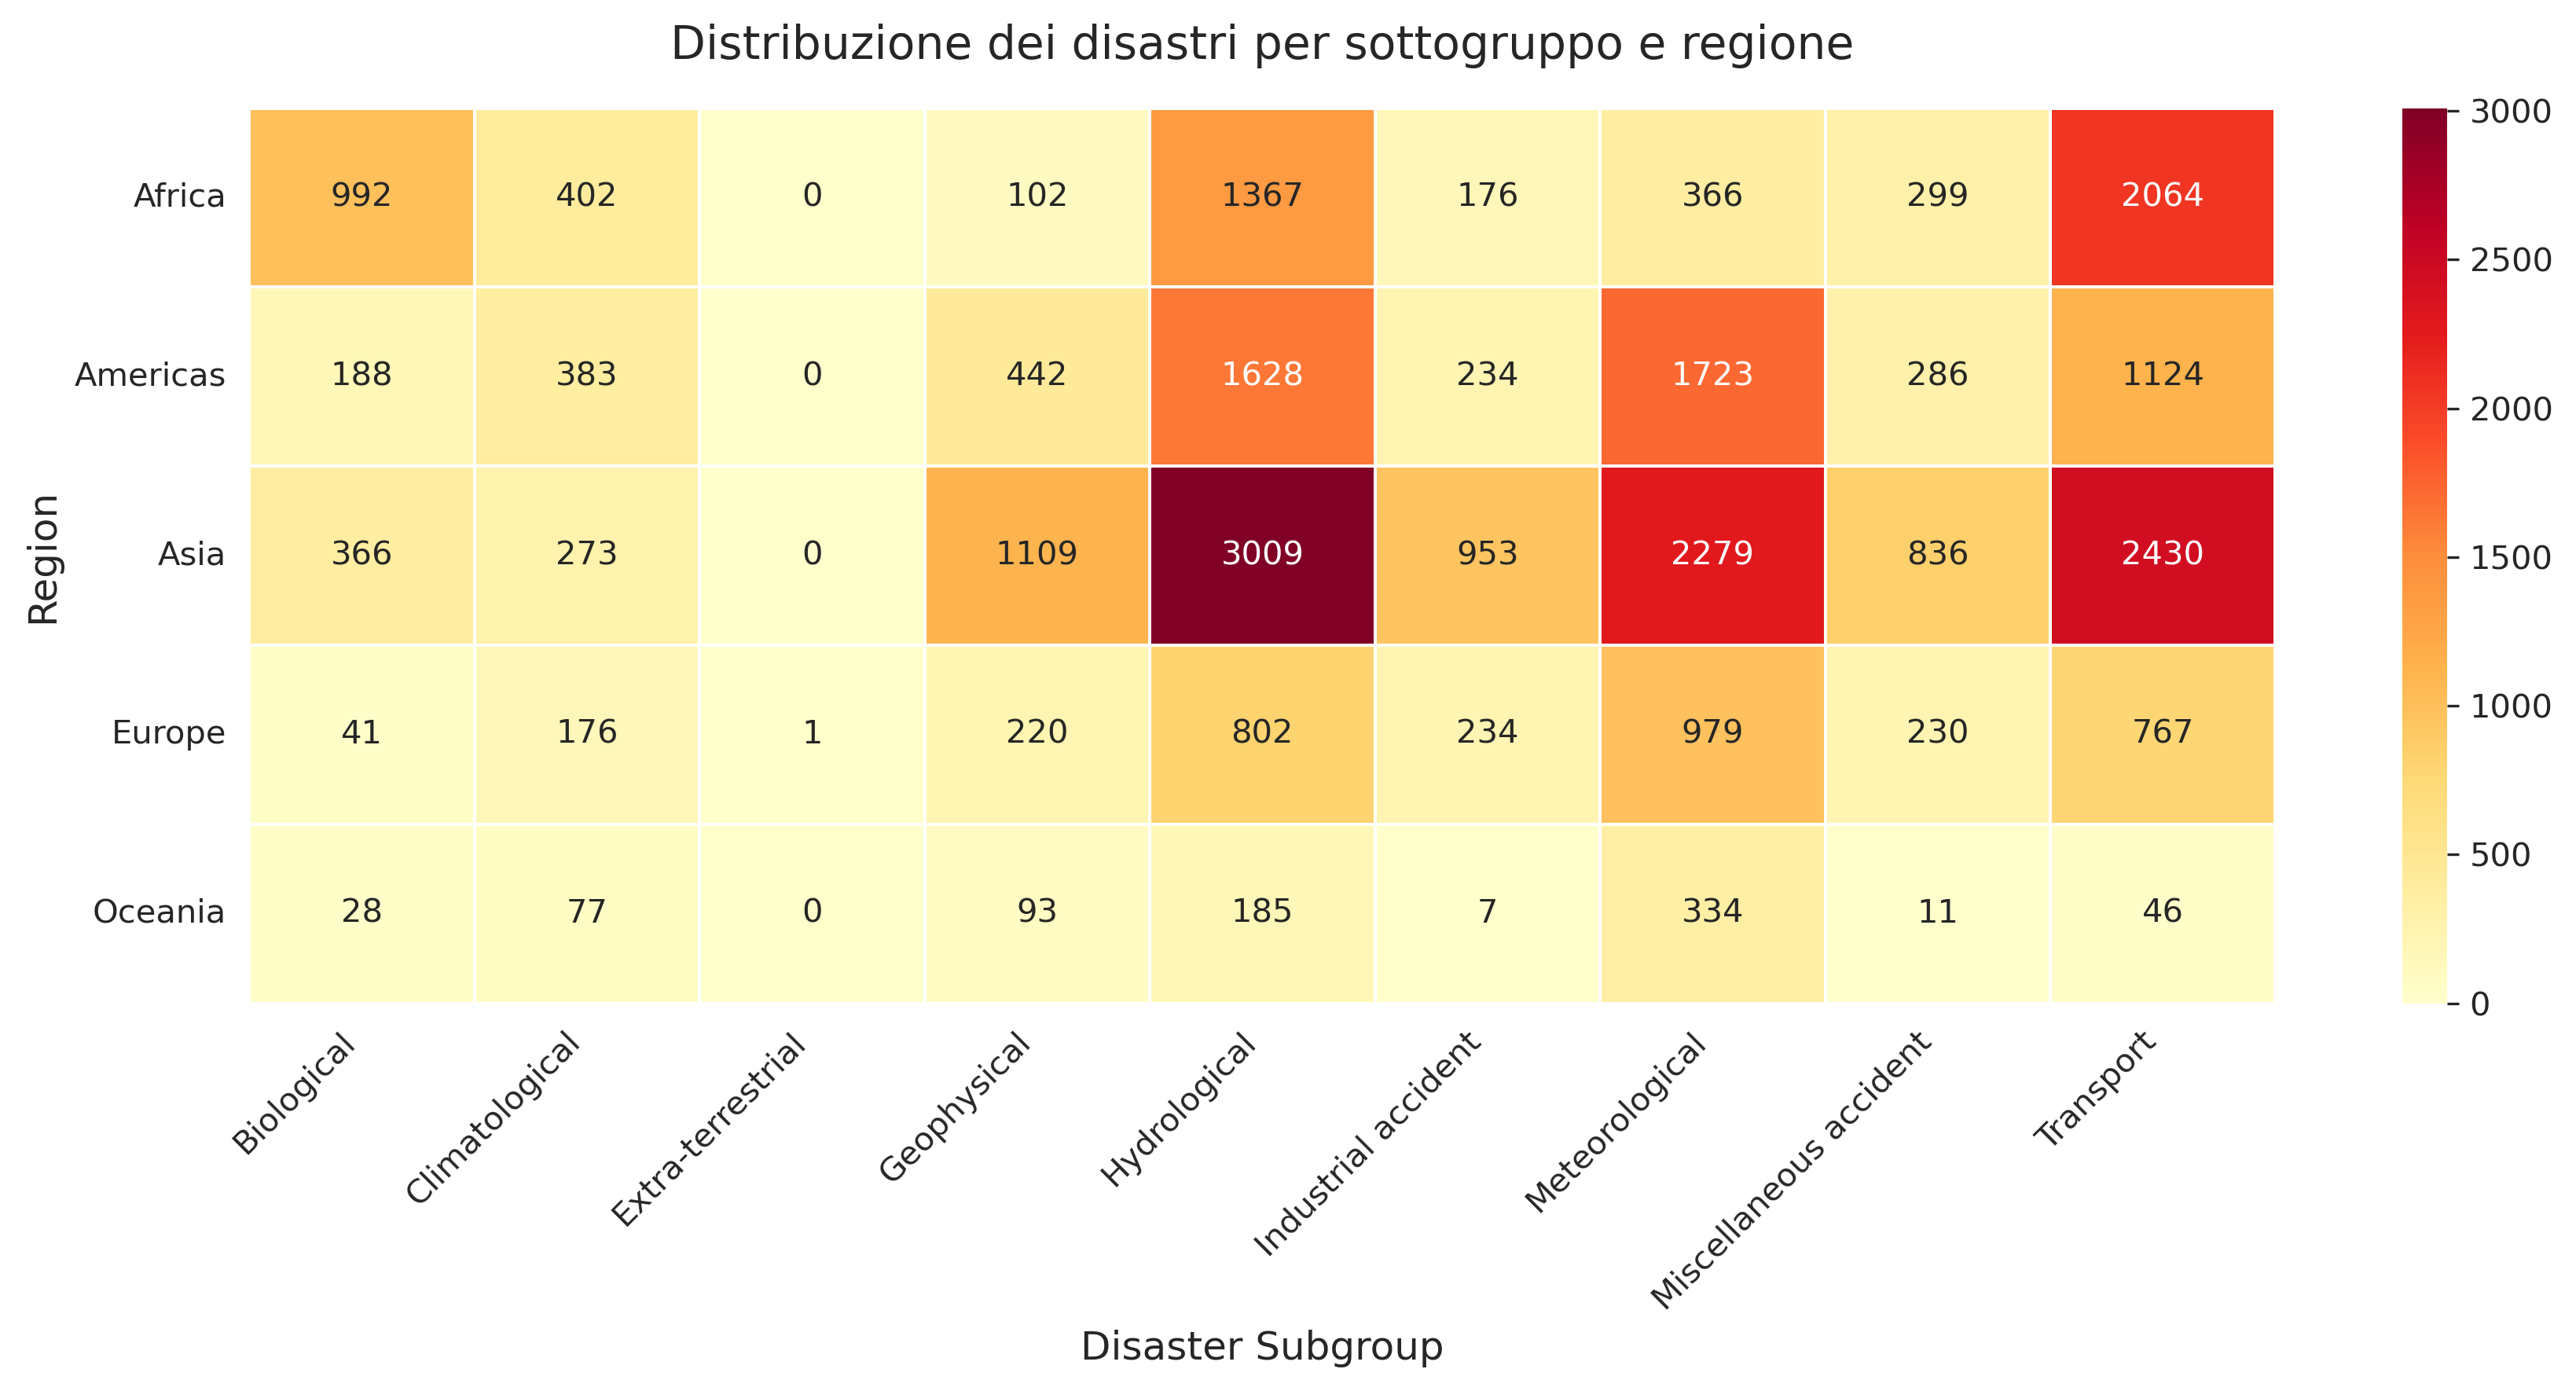

In [21]:
heat_data = (
    df.pivot_table(
        index='Region',
        columns='Disaster Subgroup',
        values='DisNo.',  
        aggfunc='count',
        fill_value=0
    )
)

plt.figure(figsize=(12, 6), dpi=300)
sns.heatmap(heat_data, cmap='YlOrRd', annot=True, fmt='d', linewidths=.5)
plt.title('Distribuzione dei disastri per sottogruppo e regione', fontsize=14, pad=15)
plt.xlabel('Disaster Subgroup', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [22]:
# Raggruppa per paese e Disaster Group
df_group = (
    df.groupby(['Country', 'Disaster Group'], as_index=False)
      .size()
      .rename(columns={'size': 'Num Disasters'})
)

# Trova per ciascun paese il gruppo di disastri predominante
df_main_group = df_group.loc[df_group.groupby('Country')['Num Disasters'].idxmax()]

# Crea la mappa 
fig = px.choropleth(
    df_main_group,
    locations='Country',
    locationmode='country names',
    color='Disaster Group',  # Naturale o Tecnologico
    hover_name='Country',
    hover_data={'Num Disasters': True, 'Disaster Group': True},
    color_discrete_map={'Natural': 'royalblue', 'Technological': 'orange'},
    title='Disaster Group predominante per Paese)',
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True, projection_type='natural earth'),
    legend_title_text='Tipo di disastro'
)

fig.show()

/tmp/ipykernel_449620/3751716151.py:12: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



In [23]:
# Conta i disastri per paese e disaster subgroup
df_subgroup_count = df.groupby(['Country','Disaster Subgroup'], as_index=False)['DisNo.'].count()

# Trova il disaster subgroup più frequente per ciascun paese
df_country_subgroup = df_subgroup_count.loc[df_subgroup_count.groupby('Country')['DisNo.'].idxmax()]

# Mappa choropleth
fig = px.choropleth(df_country_subgroup,
                    locations='Country',
                    locationmode='country names',
                    color='Disaster Subgroup',  # colore in base al disaster subgroup più frequente
                    hover_name='Country',
                    hover_data={'DisNo.':True, 'Disaster Subgroup':True},
                    color_discrete_sequence=px.colors.qualitative.Set3,
                    title='Disaster Subgroup più frequente per paese')

fig.update_layout(geo=dict(showframe=False, showcoastlines=True, projection_type='natural earth'))
fig.show()

/tmp/ipykernel_449620/3315950901.py:8: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



In [24]:
# Aggregazione per paese
df_country = df.groupby('Country', as_index=False).agg({
    'Total Affected':'sum',
    "Total Damage, Adjusted ('000 US$)":"sum",
    'DisNo.':'count'  # numero di disastri
})

# Choropleth invece di scatter_geo
fig = px.choropleth(df_country,
                    locations='Country',
                    locationmode='country names',  # usa nomi dei paesi
                    color="Total Damage, Adjusted ('000 US$)",  # colore in base al danno
                    hover_name='Country',
                    hover_data={'Total Affected':True, 'DisNo.':True},
                    color_continuous_scale=px.colors.sequential.OrRd,  # palette colore
                    title='Disastri nel mondo per paese (aggregato)')

fig.update_layout(geo=dict(showframe=False, showcoastlines=True, projection_type='natural earth'))
fig.show()

/tmp/ipykernel_449620/1170157387.py:9: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



In [25]:
df.drop(columns= ['log_Total Affected', 'log_Total Damage'], inplace= True)

### Identificazione delle variabili più rilevanti

#### Trasformazione in datetime

Sul sito web ufficiale, si segnala che per i disastri che si sviluppano gradualmente nel tempo, il giorno e il mese esatti potrebbero non essere riportati. Si veda la citazione seguente:
> For disasters developing gradually over a longer time period (e.g., drought) with no precise start/end date, this field can be left blank. 

Per questo motivo, ho deciso di trasformare le colonne contenenti queste informazioni in formato `datetime` e quindi calcolare la durata dei fenomeni. 

Innanzitutto dobbiamo assicurarci che l'anno di inizio e di fine siano sempre presenti.

In [26]:
df['Start Year'].isna().sum()
df['End Year'].isna().sum()

np.int64(0)

In [27]:
df[['Start Year',
 'Start Month',
 'Start Day',
 'End Year',
 'End Month',
 'End Day']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27262 entries, 0 to 27261
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Start Year   27262 non-null  int64  
 1   Start Month  26774 non-null  float64
 2   Start Day    23291 non-null  float64
 3   End Year     27262 non-null  int64  
 4   End Month    26484 non-null  float64
 5   End Day      23397 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 1.2 MB


In [28]:
# Riempio i mesi/giorni mancanti con 1
df['Start Month'] = df['Start Month'].fillna(1)
df['Start Day'] = df['Start Day'].fillna(1)
df['End Month'] = df['End Month'].fillna(1)
df['End Day'] = df['End Day'].fillna(1)

In [29]:
# Rinomina temporaneamente le colonne per pd.to_datetime
start_cols = df[['Start Year','Start Month','Start Day']].rename(
    columns={'Start Year':'year','Start Month':'month','Start Day':'day'}
)
end_cols = df[['End Year','End Month','End Day']].rename(
    columns={'End Year':'year','End Month':'month','End Day':'day'}
)

In [30]:
# Crea colonne datetime e memorizzale in DataFrame
df['start_date'] = pd.to_datetime(start_cols)
df['end_date'] = pd.to_datetime(end_cols)

In [31]:
# Calcola la differenza in giorni
df['duration_days'] = (df['end_date'] - df['start_date']).dt.days.apply(lambda x: max(1, x))


In [ ]:
# Elimino le colonne temporanee create +  le colonne che non hanno costi aggiustati
df.drop(columns= ['Start Month','Start Day','End Month', 
                  'End Day','start_date', 'end_date',
                   "Reconstruction Costs ('000 US$)", 
                   "Insured Damage ('000 US$)","Total Damage ('000 US$)" ], inplace= True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27262 entries, 0 to 27261
Data columns (total 33 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   DisNo.                                     27262 non-null  object 
 1   Historic                                   27262 non-null  object 
 2   Disaster Group                             27262 non-null  object 
 3   Disaster Subgroup                          27262 non-null  object 
 4   Disaster Type                              27262 non-null  object 
 5   Disaster Subtype                           27262 non-null  object 
 6   ISO                                        27262 non-null  object 
 7   Country                                    27262 non-null  object 
 8   Subregion                                  27262 non-null  object 
 9   Region                                     27262 non-null  object 
 10  Location              

#### Correlazione di Spearman

In [ ]:
numeric_columns = [
    'Magnitude',                         # intensità (scala dipendente dal tipo di disastro)
    'Total Deaths',                      # numero di morti
    'No. Injured',                       # feriti
    'No. Affected',                      # persone colpite
    'No. Homeless',                      # senza tetto
    'Total Affected',                    # totale persone impattate
    "Reconstruction Costs, Adjusted ('000 US$)",  # costi di ricostruzione
    "Insured Damage, Adjusted ('000 US$)",        # danni assicurati
    "Total Damage, Adjusted ('000 US$)",          # danni totali
    'CPI',                               # indice prezzi
    'duration_days',                     # durata del disastro
]

In [40]:
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

# Trasforma la variabile target in numeri
le = LabelEncoder() 

# Calcolo la correlazione di Spearman per ogni feature
spearman_scores = []
for col in numeric_columns:
    valid = df[[col, 'Disaster Group']].dropna()
    rho, p = stats.spearmanr(valid[col], le.fit_transform(valid['Disaster Group']))
    spearman_scores.append((col, rho, p))

# Creazione del DataFrame
spearman_df = pd.DataFrame(spearman_scores, columns=['Feature', 'Spearman_rho', 'p_value'])

spearman_df.sort_values(ascending= True, by = 'p_value')

,Feature,Spearman_rho,p_value
3,No. Affected,-0.355168,0.000000e+00
5,Total Affected,-0.659539,0.000000e+00
10,duration_days,-0.426700,0.000000e+00
2,No. Injured,-0.188847,5.016955e-73
1,Total Deaths,0.097825,2.242214e-47
8,"Total Damage, Adjusted ('000 US$)",-0.143467,2.158742e-28
4,No. Homeless,-0.081987,1.988638e-05
0,Magnitude,0.029926,3.051410e-02
9,CPI,-0.010234,9.319865e-02
7,"Insured Damage, Adjusted ('000 US$)",-0.017455,5.553479e-01


## Gestione dei dati mancanti

### Ricerca di patterns nei dati mancanti

Come riportato nella [Documentazione ufficiale](https://files.emdat.be/docs/20240808%20Caveat%20of%20missing%20data%20in%20EM-DAT.pdf), questo set di dati contiene molti dati mancanti.

> For disaster events attributed to natural hazards occurring between 1990 and 2020, proportions of missing data on the human impacts of a disaster event were found to range from 1.3% - 22.3% (Figure 1) [1]. Proportions of missing data were much greater on the economic impacts, ranging from 41.5% - 96.2%.

I dati non sono mancanti in modo casuale (Missing Completely At Random), ma nascondono schemi che potrebbero spiegare e portare a luce su possibili relazioni, come indicato anche dal sito ufficiale:

> The probability of missingness on the variables: number of people affected, number of deaths and total estimated damages (in US$) were partially explained by observed predictors of missingness: disaster type, income status of the country, disaster severity and the year the disaster occurred. For this reason, such missing data are unlikely to be missing completely at random (MCAR) [2].

Quindi, in questo caso, i metodi di gestione dei dati mancanti che si basano sul presupposto di MCAR sono inappropriati e potrebbero distorcere i risultati dello studio. 

In [36]:
# Di seguito si mostrano le percentuali di dati mancanti in ogni colonna
df.isna().mean().sort_values(ascending=False)

Reconstruction Costs, Adjusted ('000 US$)    0.998459
Insured Damage, Adjusted ('000 US$)          0.958037
No. Homeless                                 0.900924
Longitude                                    0.896669
Latitude                                     0.896669
Associated Types                             0.845206
Origin                                       0.822977
Magnitude                                    0.808305
Total Damage, Adjusted ('000 US$)            0.784499
Admin Units                                  0.691329
No. Injured                                  0.669907
No. Affected                                 0.579268
Magnitude Scale                              0.373303
Total Affected                               0.325545
Total Deaths                                 0.202553
Location                                     0.091849
CPI                                          0.012838
DisNo.                                       0.000000
Appeal                      

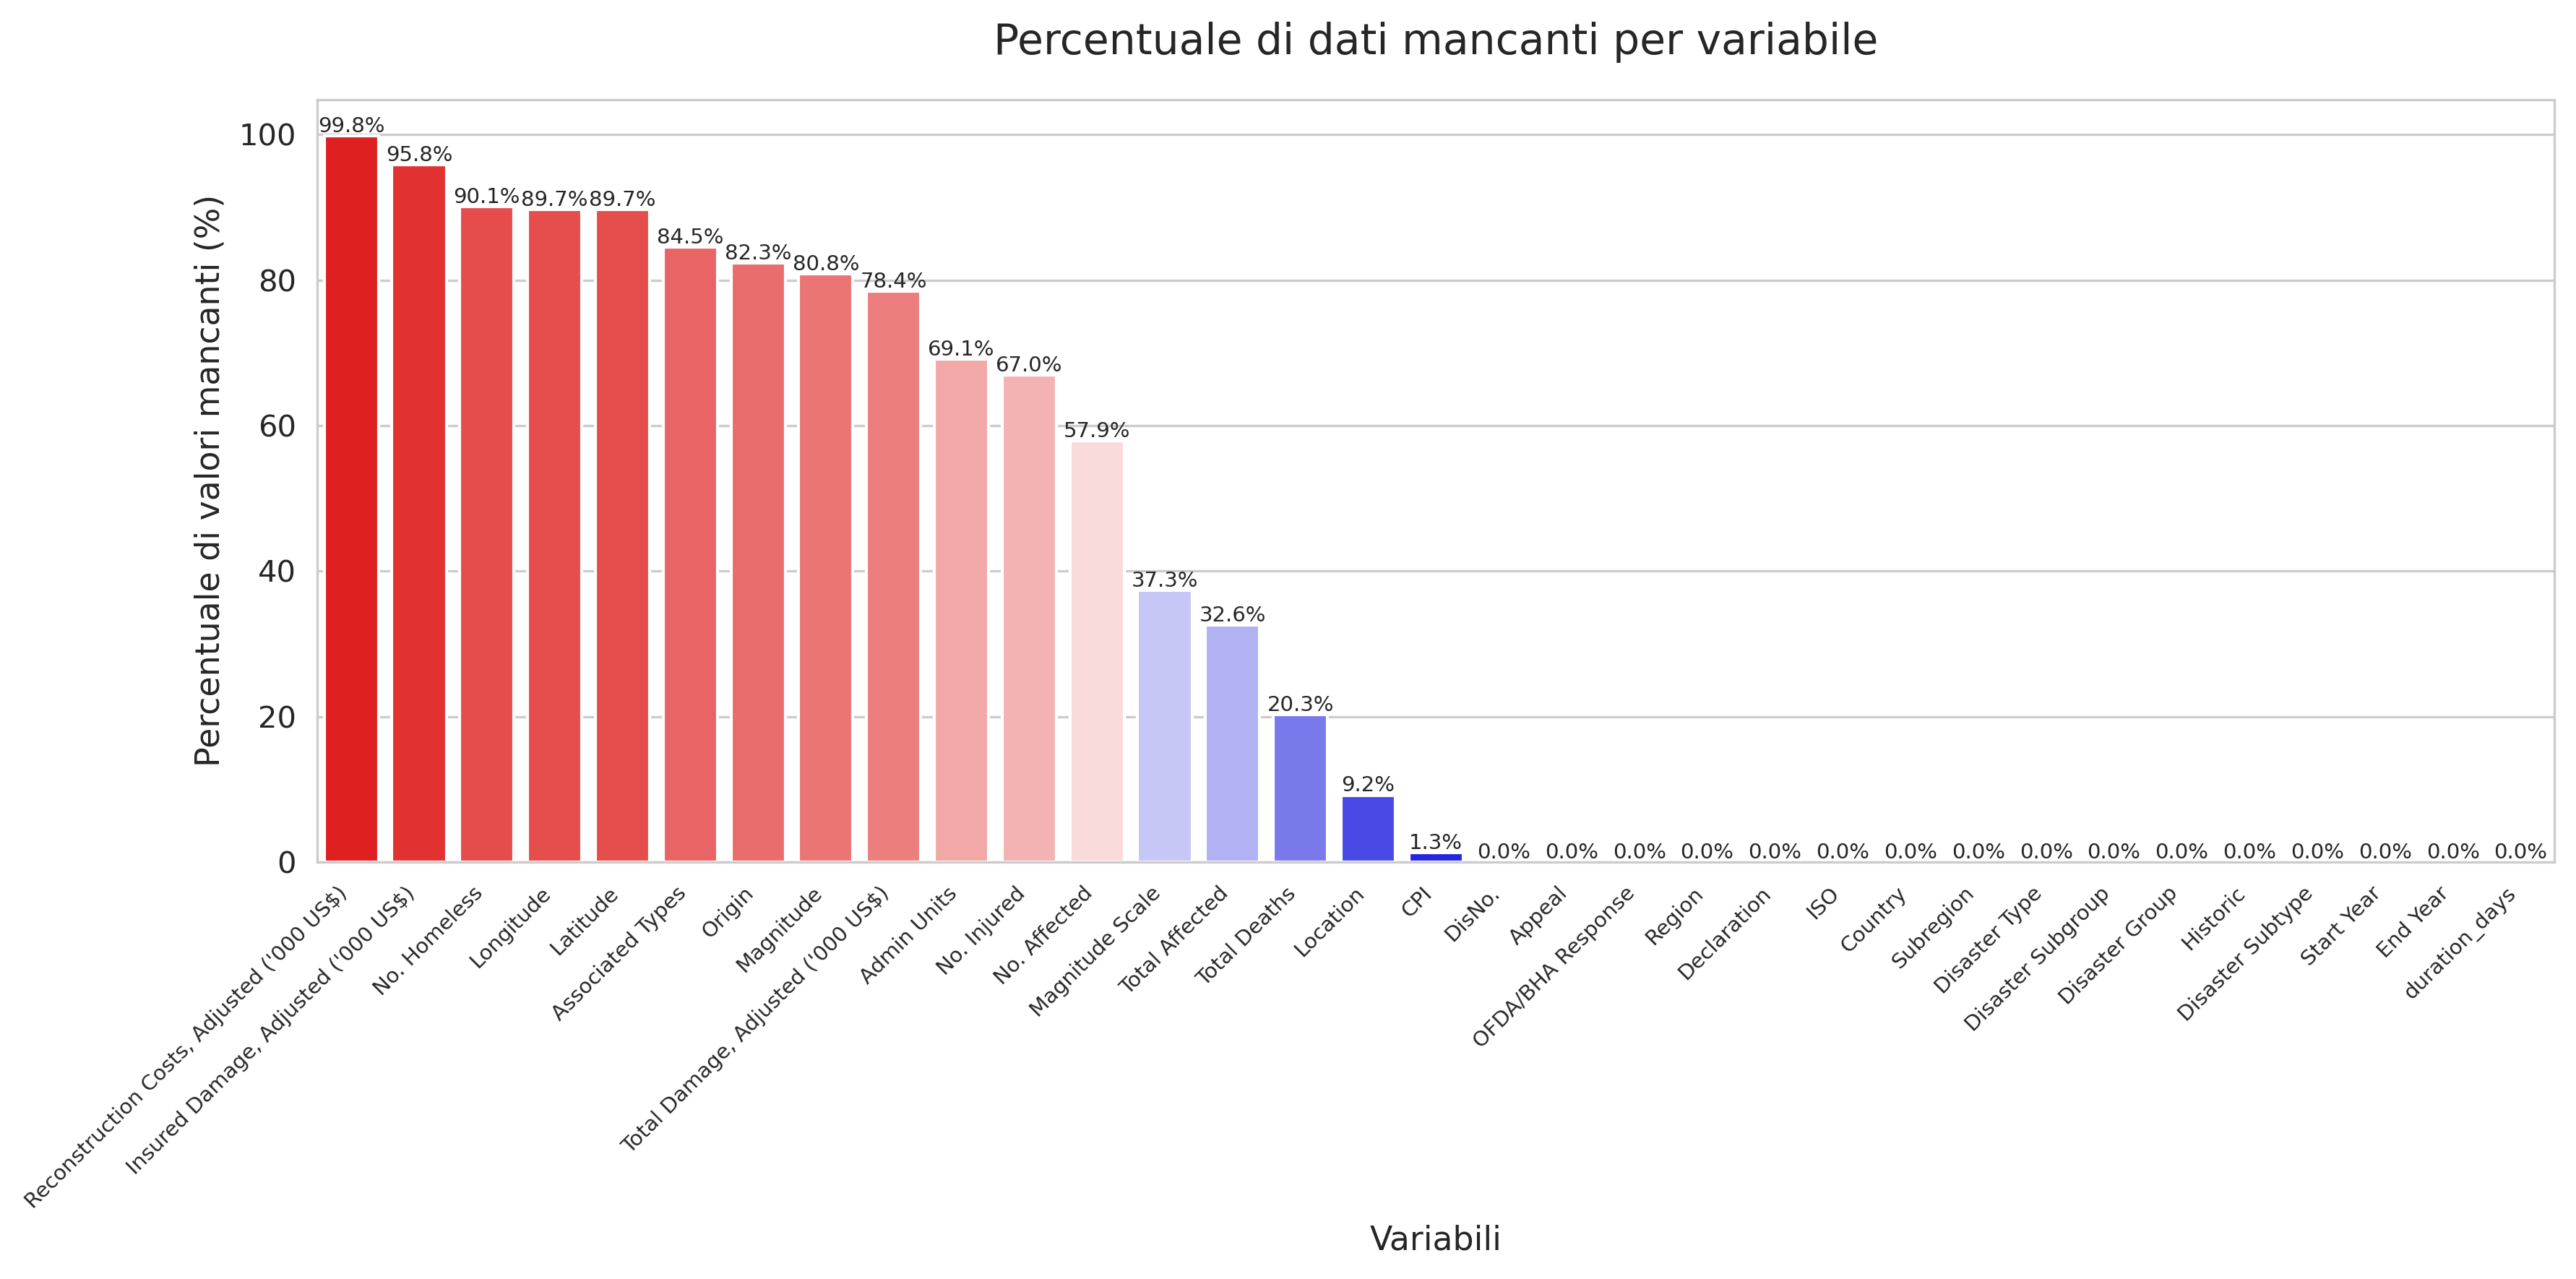

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcola le percentuali di dati mancanti
missing_percent = df.isna().mean().sort_values(ascending=False) * 100

plt.figure(figsize=(12, 6), dpi=300)
ax = sns.barplot(
    x= missing_percent.index,
    y = missing_percent.values,
    hue = missing_percent.values,
    palette="bwr",
    legend = False)

# Aggiunge le percentuali sopra ogni barra
for i, v in enumerate(missing_percent.values):
    ax.text(i, v + 0.5, f"{v:.1f}%", ha='center', fontsize=7)

plt.title("Percentuale di dati mancanti per variabile", fontsize=14, pad=15)
plt.ylabel("Percentuale di valori mancanti (%)", fontsize=11)
plt.xlabel("Variabili", fontsize=11)

plt.xticks(rotation=45, ha='right', fontsize=7)

plt.tight_layout()
plt.show()

#### Ipotesi `MAR`

La mia ipotesi è che la probabilità di mancata rilevazione delle variabili come numero di persone colpite, numero di decessi e danni totali stimati sia spiegata da fattori predittivi di mancata rilevazione osservati, quali il tipo di disastro, lo stato di reddito del paese, l'anno in cui si è verificato il disastro e/o fattori non osservati.

In questa sezione cercherò di trovare la correlazione di Pearson tra il numero di dati mancanti e queste variabili.

In [41]:
# 1 if missing, 0 if present
df['missing_deaths'] = df['Total Deaths'].isna().astype(int)
df['missing_affected'] = df['Total Affected'].isna().astype(int)
df['missing_damage'] = df["Total Damage, Adjusted ('000 US$)"].isna().astype(int)

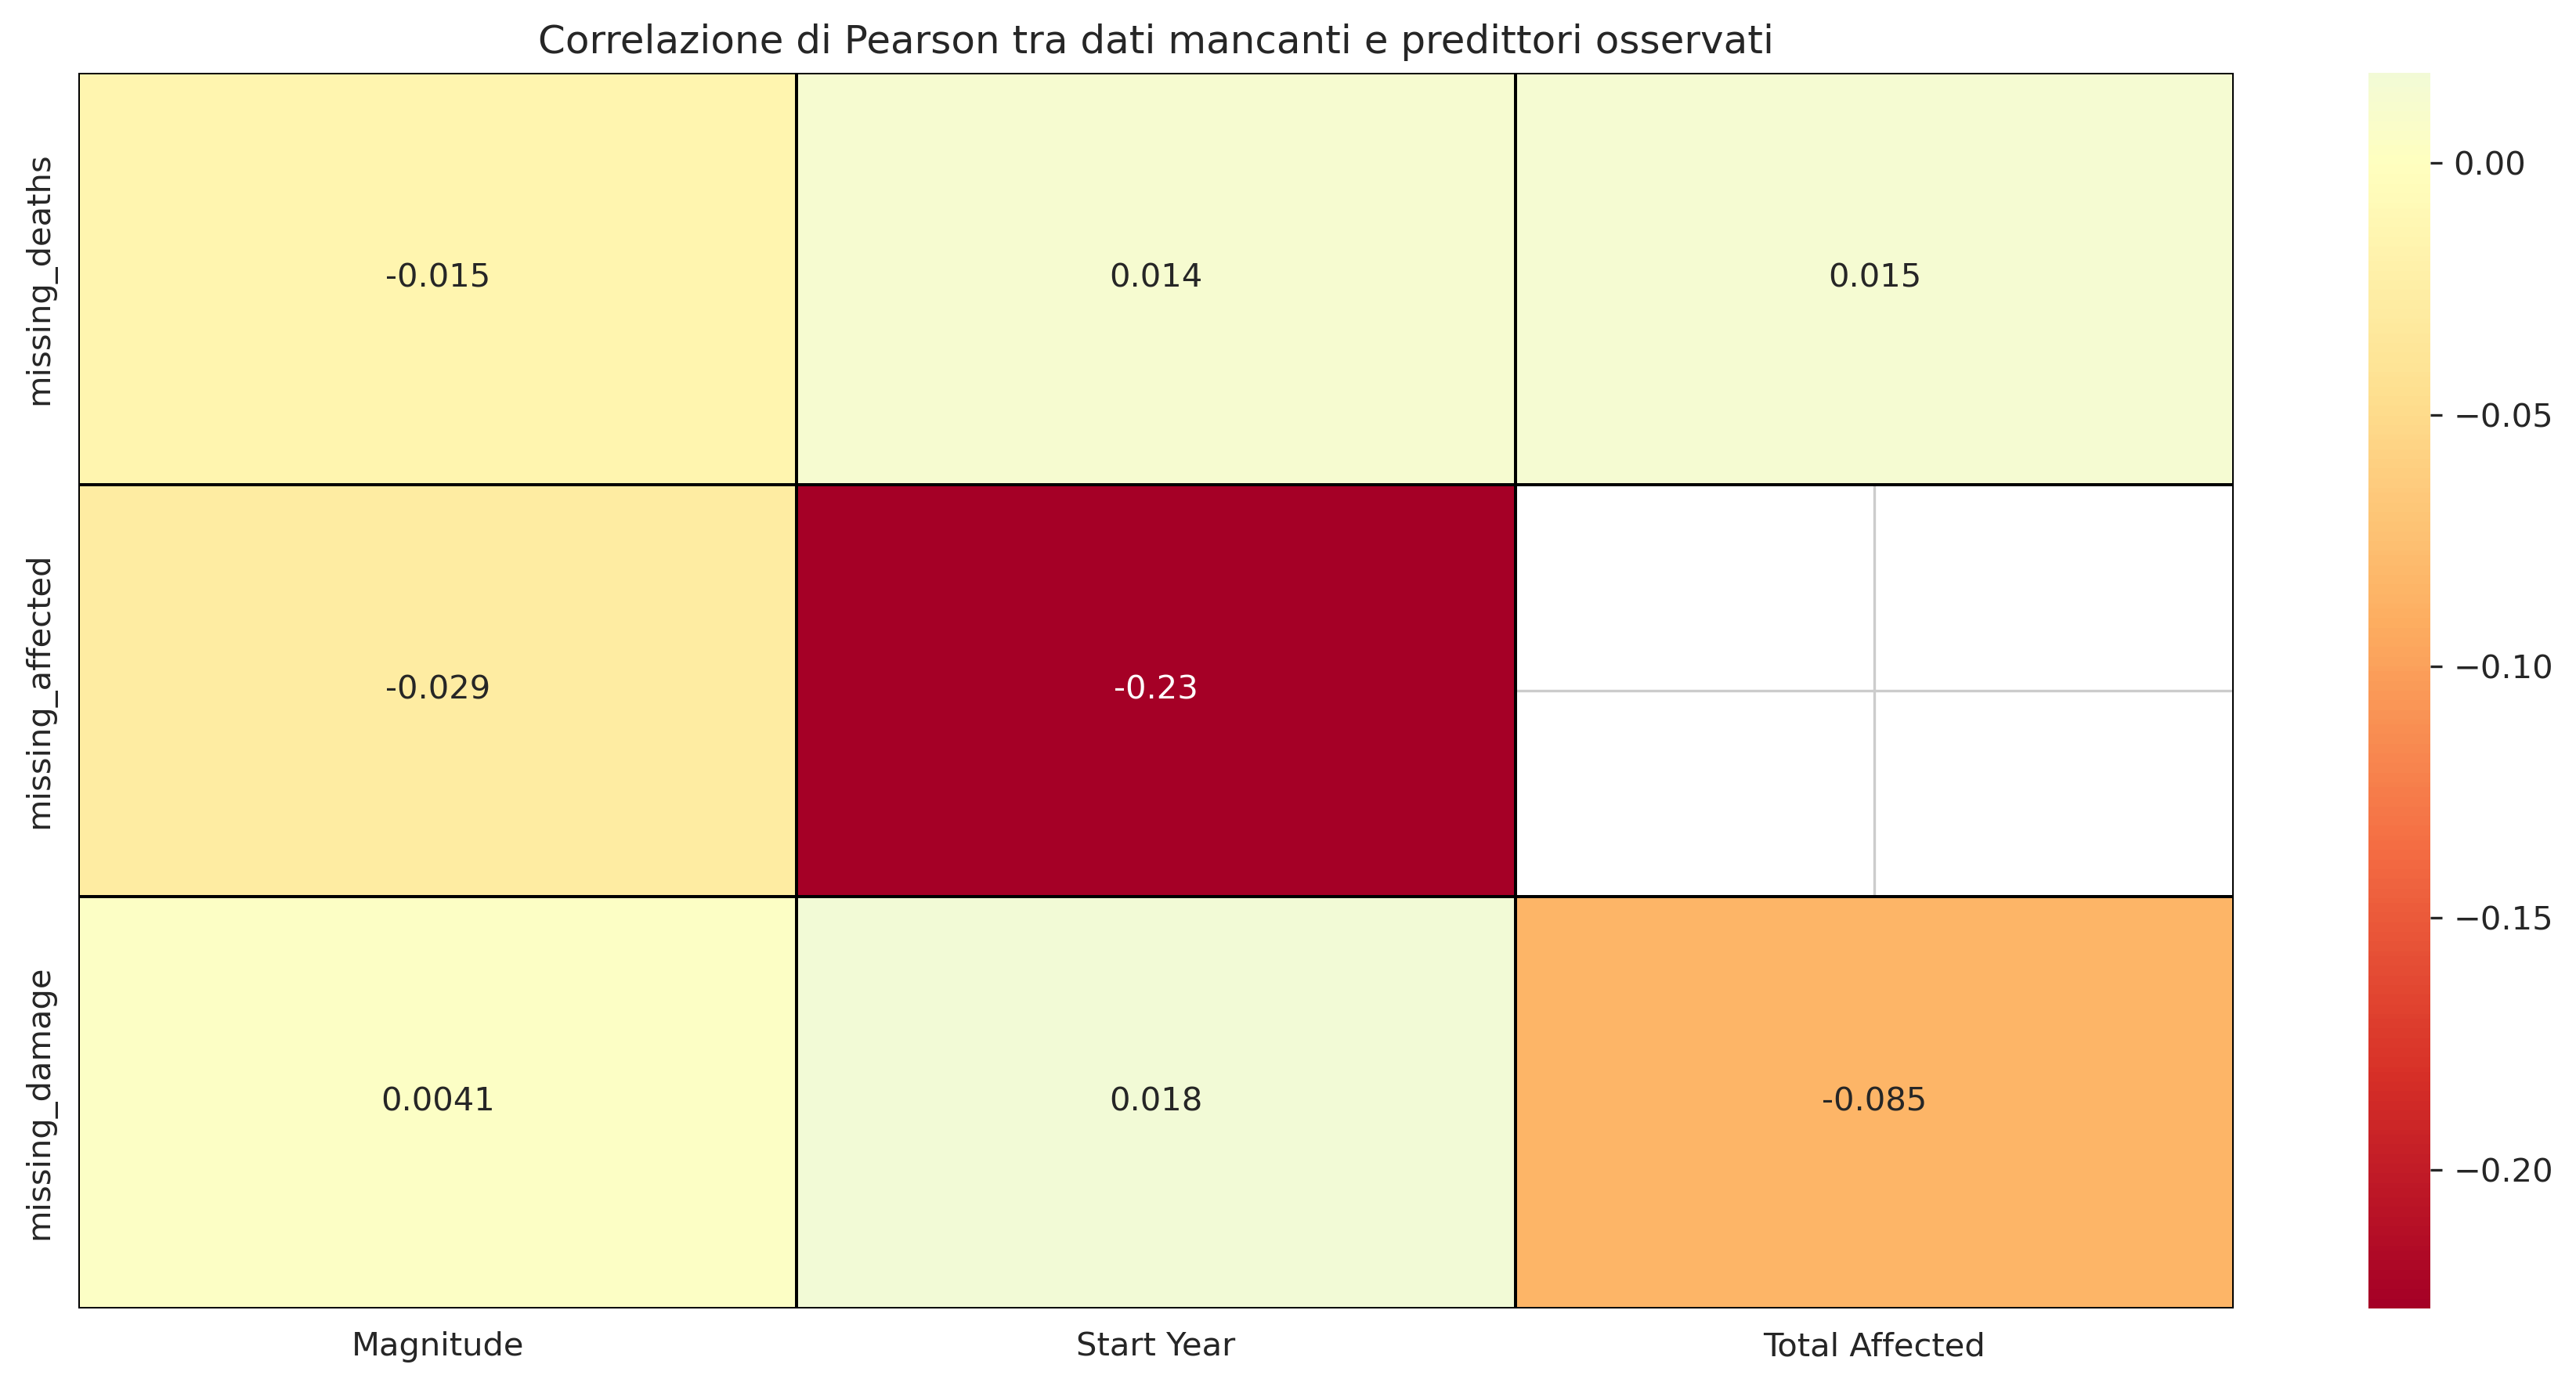

In [ ]:
numeric_vars = ['Magnitude', 'Start Year', 'Total Affected']
missing_vars = ['missing_deaths', 'missing_affected', 'missing_damage']

corr_matrix = df[numeric_vars + missing_vars].corr(method='pearson')

# Visualizzazione
plt.figure(figsize=(12, 6), dpi=300)

# Heatmap 
sns.heatmap(
    corr_matrix.loc[missing_vars, numeric_vars],
    annot=True,
    cmap='RdYlBu',    
    center=0,
    linewidths=0.5,
    linecolor='black'
)

plt.title("Correlazione di Pearson tra dati mancanti e predittori osservati")
plt.tight_layout()
plt.show()


Da questo grafico chiamato `heatmap` notiamo che il valore di correlazione più basso disponibile è quello tra l'anno di inizio del disastro e le persone colpite.
La correlazione di `-0.23` indica che i disastri più recenti hanno leggermente meno dati mancanti sul numero di persone colpite. È una correlazione debole ma coerente con l’idea che i dati storici sono meno completi. 

#### Ipotesi `MNAR`

Se in `MAR`, la probabilità che un valore sia mancante dipende da altre variabili osservate nel set di dati, in `MNAR`, dipende dal valore mancante stesso o da altri fattori non osservati, rendendolo il tipo più difficile da gestire

Una variabile che non possiamo osservare in questo dataset è lo stato di reddito del paese/regione. Pertanto, la mia ipotesi iniziale è che i paesi più poveri sono meno in grado di segnalare perdite economiche. L'imputazione in tali condizioni produrrebbe stime altamente inaffidabili e distorte.

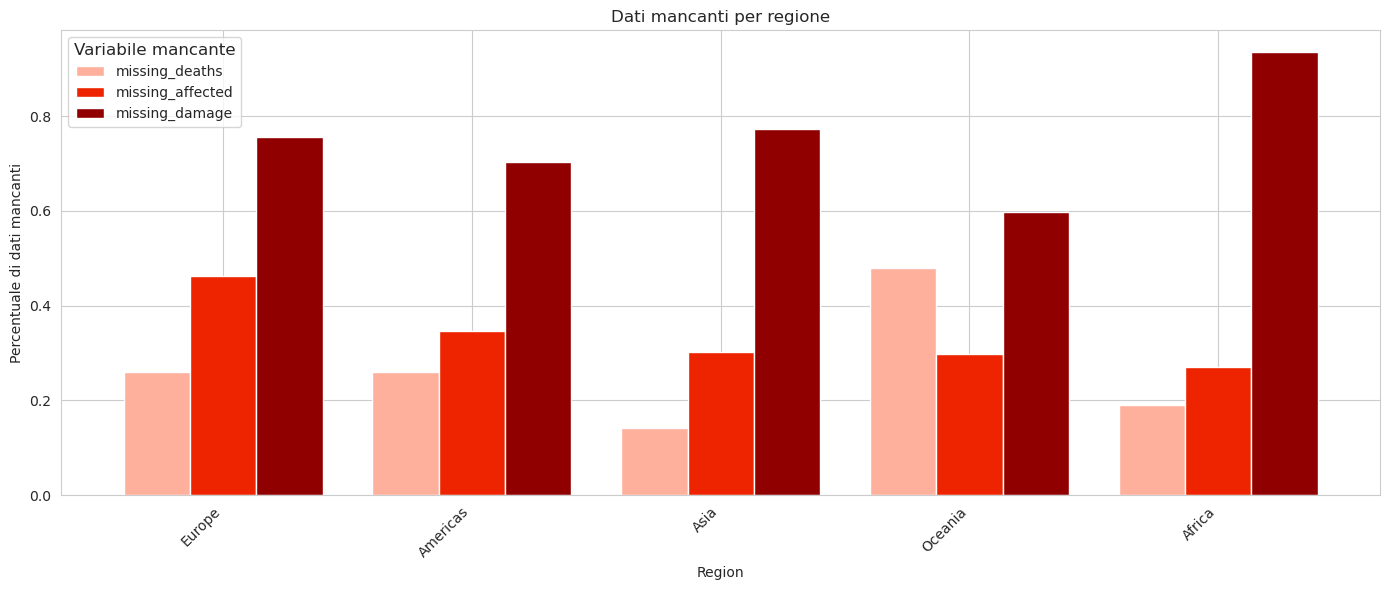

In [40]:
# Calcolo la percentuale dei dati mancanti per regione
region_missing = df.groupby('Region')[['missing_deaths', 'missing_affected', 'missing_damage']].mean()

# Ordino per una delle colonne
region_missing = region_missing.sort_values(by='missing_affected', ascending=False)

# Traccio tutti e tre gli indicatori uno accanto all'altro 
colors = ['#ffb09c', '#ee2400', '#900000']  

ax = region_missing.plot(
    kind='bar',
    figsize=(14,6),
    width=0.8,
    color=colors
)

plt.ylabel('Percentuale di dati mancanti')
plt.title('Dati mancanti per regione')
plt.xticks(rotation=45, ha='right')

plt.legend(title='Variabile mancante', fontsize=10, title_fontsize=12)

plt.tight_layout()
plt.show()

Da questo grafico vediamo che l'Africa ha il numero più alto di dati mancanti nei danni economici. Ciò dimostra la teoria secondo cui l'Africa, con un PIL e risorse economiche relativamente bassi, non è stata in grado di segnalare i danni economici. \
Per scoprire se la nostra ipotesi è anche statisticamente significativa, farò un test del `chi quadrato` e troverò il valore di `p`.

L’idea è quella di verificare se la probabilità di avere dati mancanti dipende dalla regione, cioè se è sistematica. Il test confronta le frequenze osservate con quelle attese sotto l’ipotesi nulla di indipendenza.

In [41]:
import scipy.stats as stats

contingency = pd.crosstab(df['Region'], df['missing_damage'])
chi2, p, dof, expected = stats.chi2_contingency(contingency)

print(f"Chi2 = {chi2:.2f}, p-value = {p:.4f}")


Chi2 = 1188.00, p-value = 0.0000


Il risultato dimostra che la probabilità della relazione osservata sia dovuta al caso è praticamente nulla. Questo conferma formalmente che i dati mancanti sono strutturati e supporta l’argomento teorico che la mancanza di informazioni economiche è legata alla capacità di reporting dei paesi. Quindi, la presenza di dati mancanti nei danni economici dipende fortemente dalla regione.

In [42]:
df.drop(columns= ['DisNo.', 'Historic',  'ISO', 'Region',
 'Location',
 'Origin',
 'Associated Types',
 'OFDA/BHA Response',
 'Appeal',
 'Declaration', 'Magnitude Scale',
 'Latitude',
 'Longitude',
 'Start Year',
 'End Year',
 "Reconstruction Costs, Adjusted ('000 US$)",
 "Insured Damage, Adjusted ('000 US$)",
 'CPI',
 'Admin Units',
 'missing_deaths',
 'missing_affected',
 'missing_damage'], inplace= True)

In [43]:
df.columns.to_list()

['Disaster Group',
 'Disaster Subgroup',
 'Disaster Type',
 'Disaster Subtype',
 'Country',
 'Subregion',
 'Magnitude',
 'Total Deaths',
 'No. Injured',
 'No. Affected',
 'No. Homeless',
 'Total Affected',
 "Total Damage, Adjusted ('000 US$)",
 'duration_days']

#### Eliminazione di righe

In [ ]:
# Colonne da escludere nel calcolo (categoriche)
exclude_cols = [
    'Disaster Group',
    'Disaster Subgroup',
    'Disaster Type',
    'Disaster Subtype',
    'Country',
    'Subregion'
]

# Seleziona solo le colonne da considerare
cols_to_check = [col for col in df.columns if col not in exclude_cols]

# Calcola la percentuale di NaN per ogni riga
missing_percent_row = df[cols_to_check].isna().mean(axis=1) * 100

In [45]:
missing_percent_row.describe()

count    27262.000000
mean        53.387499
std         18.694375
min          0.000000
25%         37.500000
50%         50.000000
75%         75.000000
max         87.500000
dtype: float64

In [46]:
rows_to_drop = missing_percent_row[missing_percent_row > 70].index
print(f"Numero di righe da eliminare: {len(rows_to_drop)} ({len(rows_to_drop)/len(df)*100:.2f}% del totale)")

# Elimina le righe
df_cleaned = df.drop(rows_to_drop)

# Risultato finale
print(f"Dataset dopo la rimozione: {df_cleaned.shape[0]} righe, {df_cleaned.shape[1]} colonne")

Numero di righe da eliminare: 7568 (27.76% del totale)
Dataset dopo la rimozione: 19694 righe, 14 colonne


#### Eliminazione di colonne

In [47]:
# Percentuale di valori mancanti per colonna
missing_percent = df.isna().mean() * 100

# Ordina dalla colonna con più valori mancanti a quella con meno
missing_percent = missing_percent.sort_values(ascending=False)

# Mostra in modo leggibile
print(missing_percent)

No. Homeless                         90.092436
Magnitude                            80.830460
Total Damage, Adjusted ('000 US$)    78.449857
No. Injured                          66.990683
No. Affected                         57.926785
Total Affected                       32.554471
Total Deaths                         20.255300
Country                               0.000000
Subregion                             0.000000
Disaster Type                         0.000000
Disaster Subgroup                     0.000000
Disaster Group                        0.000000
Disaster Subtype                      0.000000
duration_days                         0.000000
dtype: float64


In [48]:
df.drop(columns= ['No. Homeless', 'Magnitude'], inplace= True)

In [49]:
df.columns.to_list()

['Disaster Group',
 'Disaster Subgroup',
 'Disaster Type',
 'Disaster Subtype',
 'Country',
 'Subregion',
 'Total Deaths',
 'No. Injured',
 'No. Affected',
 'Total Affected',
 "Total Damage, Adjusted ('000 US$)",
 'duration_days']

### Metodo di imputazione
sotto l'ipotesi di MNAR

In [ ]:
numerical_cols = [
    'Total Deaths',
    'No. Injured',
    'No. Affected',
    'Total Affected',
    "Total Damage, Adjusted ('000 US$)",
    'duration_days'
]

from fancyimpute import IterativeImputer

# df è il DataFrame originale
numerical_data = df[numerical_cols]

# ML imputation usando IterativeImputer (approccio multivariato)
imputer = IterativeImputer(max_iter=10, random_state=42)
numerical_imputed = imputer.fit_transform(numerical_data)

# Rimettere nel DataFrame
df[numerical_cols] = numerical_imputed

In [52]:
df.describe()

,Total Deaths,No. Injured,No. Affected,Total Affected,"Total Damage, Adjusted ('000 US$)",duration_days
count,2.726200e+04,2.726200e+04,2.726200e+04,2.726200e+04,2.726200e+04,27262.000000
mean,1.567757e+03,1.961443e+03,4.798972e+05,4.865467e+05,1.311485e+06,16.956129
std,4.451421e+04,3.674358e+04,5.022456e+06,5.068766e+06,4.619928e+06,180.066908
min,-2.179056e+04,-8.378176e+04,-8.435574e+05,1.000000e+00,-6.590515e+06,1.000000
25%,1.100000e+01,2.500000e+01,1.000000e+02,2.670000e+02,1.073747e+06,1.000000
50%,2.700000e+01,6.468461e+02,1.934600e+04,2.000000e+04,1.247383e+06,1.000000
75%,1.730000e+02,8.041924e+02,4.783382e+05,4.862900e+05,1.299243e+06,2.000000
max,3.700000e+06,2.839345e+06,3.300000e+08,3.300000e+08,4.787113e+08,25575.000000


# Dataset dopo la fase di pre-elaborazione

In [56]:
df.to_csv("em_processed.csv", index = False)